In [1]:
from utils import *
from fastai.callbacks import SaveModelCallback

VISUALIZE_EMBEDDINGS = True

## Preparing Data

In [2]:
def pred_mean_minK(distances, axis=1):
    # axis is not used
    k = 5
    return np.mean(np.sort(distances, axis=-1)[:, :k], axis=1)

all_data = prepare_CIFAR10_train_subsampled_databunch(size=120, valid_pct=0.2, random_seed=1)
toytest = ToyAnomalyDetection(all_data, n_anomaly_labels=8, n_cases=10, distance='cosine',
                              subsample_size=100, pred_fn=pred_mean_minK)

Files already downloaded and verified


## 1. Conventional softmax model

epoch,train_loss,valid_loss,accuracy,time
0,2.513664,1.935809,0.314583,00:02


epoch,train_loss,valid_loss,accuracy,time
0,2.295249,1.861609,0.337500,00:02
1,2.155591,1.725207,0.391667,00:02
2,2.030757,1.749640,0.456250,00:02
3,1.881970,1.536671,0.500000,00:02
4,1.744601,1.369542,0.508333,00:02
5,1.596076,1.263719,0.566667,00:02
6,1.492910,1.246096,0.585417,00:02
7,1.398526,1.173391,0.604167,00:02
8,1.324077,1.160535,0.600000,00:02
9,1.265591,1.167524,0.585417,00:02


Better model found at epoch 0 with val_loss value: 1.8616091012954712.
Better model found at epoch 1 with val_loss value: 1.7252066135406494.
Better model found at epoch 3 with val_loss value: 1.5366710424423218.
Better model found at epoch 4 with val_loss value: 1.3695424795150757.
Better model found at epoch 5 with val_loss value: 1.2637187242507935.
Better model found at epoch 6 with val_loss value: 1.2460960149765015.
Better model found at epoch 7 with val_loss value: 1.1733914613723755.
Better model found at epoch 8 with val_loss value: 1.1605345010757446.


epoch,train_loss,valid_loss,accuracy,time
0,1.185548,1.160231,0.602083,00:02
1,1.182621,1.171010,0.618750,00:02
2,1.223322,1.243060,0.618750,00:02
3,1.229564,1.277713,0.572917,00:02
4,1.214629,1.360573,0.572917,00:02
5,1.163449,1.195697,0.616667,00:02
6,1.093552,1.132687,0.620833,00:02
7,1.043118,1.161420,0.645833,00:02
8,1.009012,1.132457,0.647917,00:02
9,0.982693,1.138525,0.639583,00:02


Better model found at epoch 0 with val_loss value: 1.1602305173873901.
Better model found at epoch 6 with val_loss value: 1.1326868534088135.
Better model found at epoch 8 with val_loss value: 1.132456660270691.


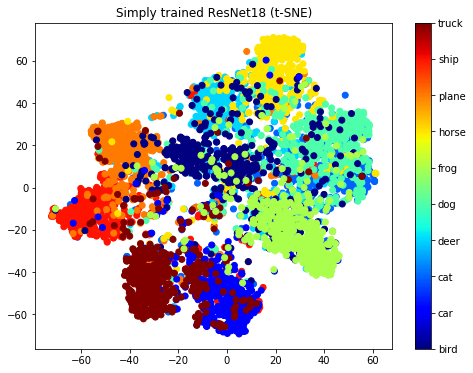

In [3]:
# Define model learner
def learner_conventional(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy).mixup()
    learn.fit_one_cycle(1)
    learn.unfreeze()
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    return learn

if VISUALIZE_EMBEDDINGS:
    learn = learner_conventional(all_data)
    visualize_learner_embeddings(learn, 'Simply trained ResNet18 (t-SNE)', all_data)

In [4]:
# Test model
toytest.do_tests('Conventional', learner_conventional, delete_models=True)


Testing Conventional for case #0


epoch,train_loss,valid_loss,accuracy,time
0,0.873028,0.656622,0.660000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.764050,0.668347,0.575000,00:01
1,0.701976,0.629973,0.620000,00:01
2,0.685955,0.559514,0.720000,00:01
3,0.640258,0.537986,0.720000,00:01
4,0.620148,0.445842,0.790000,00:01
5,0.594482,0.412821,0.825000,00:01
6,0.569916,0.402069,0.835000,00:01
7,0.557761,0.380780,0.850000,00:01
8,0.555573,0.364950,0.860000,00:01
9,0.543037,0.360812,0.850000,00:01


Better model found at epoch 0 with val_loss value: 0.6683471202850342.
Better model found at epoch 1 with val_loss value: 0.6299733519554138.
Better model found at epoch 2 with val_loss value: 0.5595138669013977.
Better model found at epoch 3 with val_loss value: 0.5379863977432251.
Better model found at epoch 4 with val_loss value: 0.4458416998386383.
Better model found at epoch 5 with val_loss value: 0.41282132267951965.
Better model found at epoch 6 with val_loss value: 0.40206924080848694.
Better model found at epoch 7 with val_loss value: 0.3807797133922577.
Better model found at epoch 8 with val_loss value: 0.3649500608444214.
Better model found at epoch 9 with val_loss value: 0.3608124852180481.


epoch,train_loss,valid_loss,accuracy,time
0,0.416937,0.365366,0.850000,00:01
1,0.416677,0.355288,0.865000,00:01
2,0.403180,0.333071,0.860000,00:01
3,0.390219,0.306732,0.875000,00:01
4,0.391203,0.307755,0.875000,00:01
5,0.384151,0.311052,0.885000,00:01
6,0.380747,0.300295,0.895000,00:01
7,0.376981,0.296597,0.900000,00:01
8,0.365997,0.290653,0.890000,00:01
9,0.366536,0.290258,0.885000,00:01


Better model found at epoch 0 with val_loss value: 0.36536601185798645.
Better model found at epoch 1 with val_loss value: 0.35528814792633057.
Better model found at epoch 2 with val_loss value: 0.3330710232257843.
Better model found at epoch 3 with val_loss value: 0.3067319393157959.
Better model found at epoch 6 with val_loss value: 0.30029526352882385.
Better model found at epoch 7 with val_loss value: 0.29659682512283325.
Better model found at epoch 8 with val_loss value: 0.2906530499458313.
Better model found at epoch 9 with val_loss value: 0.2902583181858063.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing Conventional for case #1


epoch,train_loss,valid_loss,accuracy,time
0,0.941113,0.601879,0.670000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.694675,0.569159,0.755000,00:01
1,0.679085,0.504060,0.820000,00:01
2,0.637836,0.428134,0.835000,00:01
3,0.611770,0.356617,0.865000,00:01
4,0.602993,0.337065,0.865000,00:01
5,0.582603,0.389354,0.815000,00:01
6,0.547668,0.379828,0.805000,00:01
7,0.511386,0.374819,0.805000,00:01
8,0.499534,0.359317,0.825000,00:01
9,0.491461,0.355055,0.825000,00:01


Better model found at epoch 0 with val_loss value: 0.5691592693328857.
Better model found at epoch 1 with val_loss value: 0.5040599703788757.
Better model found at epoch 2 with val_loss value: 0.42813360691070557.
Better model found at epoch 3 with val_loss value: 0.3566165566444397.
Better model found at epoch 4 with val_loss value: 0.3370648920536041.


epoch,train_loss,valid_loss,accuracy,time
0,0.489963,0.337138,0.845000,00:01
1,0.449638,0.335937,0.815000,00:01
2,0.439890,0.337969,0.830000,00:01
3,0.442631,0.285861,0.865000,00:01
4,0.436344,0.284573,0.865000,00:01
5,0.425537,0.281459,0.860000,00:01
6,0.424918,0.267702,0.895000,00:01
7,0.415741,0.268786,0.900000,00:01
8,0.412013,0.285248,0.875000,00:01
9,0.409237,0.278783,0.880000,00:01


Better model found at epoch 0 with val_loss value: 0.337137907743454.
Better model found at epoch 1 with val_loss value: 0.335936963558197.
Better model found at epoch 3 with val_loss value: 0.28586140275001526.
Better model found at epoch 4 with val_loss value: 0.2845726013183594.
Better model found at epoch 5 with val_loss value: 0.28145885467529297.
Better model found at epoch 6 with val_loss value: 0.26770222187042236.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing Conventional for case #2


epoch,train_loss,valid_loss,accuracy,time
0,0.936987,0.588786,0.790000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.755780,0.582283,0.700000,00:01
1,0.727896,0.532608,0.765000,00:01
2,0.685706,0.460170,0.830000,00:01
3,0.620298,0.425657,0.780000,00:01
4,0.590987,0.382449,0.820000,00:01
5,0.569872,0.312649,0.865000,00:01
6,0.545319,0.285009,0.890000,00:01
7,0.516770,0.251591,0.910000,00:01
8,0.494656,0.229187,0.935000,00:01
9,0.483012,0.226755,0.920000,00:01


Better model found at epoch 0 with val_loss value: 0.5822833180427551.
Better model found at epoch 1 with val_loss value: 0.5326080918312073.
Better model found at epoch 2 with val_loss value: 0.4601703882217407.
Better model found at epoch 3 with val_loss value: 0.42565736174583435.
Better model found at epoch 4 with val_loss value: 0.3824493885040283.
Better model found at epoch 5 with val_loss value: 0.3126489520072937.
Better model found at epoch 6 with val_loss value: 0.28500887751579285.
Better model found at epoch 7 with val_loss value: 0.2515912353992462.
Better model found at epoch 8 with val_loss value: 0.22918716073036194.
Better model found at epoch 9 with val_loss value: 0.22675521671772003.


epoch,train_loss,valid_loss,accuracy,time
0,0.352321,0.223700,0.930000,00:01
1,0.378195,0.216681,0.925000,00:01
2,0.365412,0.208206,0.905000,00:01
3,0.348941,0.214208,0.920000,00:01
4,0.355184,0.235157,0.930000,00:01
5,0.353085,0.218291,0.920000,00:01
6,0.337448,0.202110,0.930000,00:01
7,0.331616,0.193883,0.930000,00:01
8,0.330264,0.191111,0.925000,00:01
9,0.323962,0.194198,0.920000,00:01


Better model found at epoch 0 with val_loss value: 0.22370022535324097.
Better model found at epoch 1 with val_loss value: 0.21668118238449097.
Better model found at epoch 2 with val_loss value: 0.20820561051368713.
Better model found at epoch 6 with val_loss value: 0.20210981369018555.
Better model found at epoch 7 with val_loss value: 0.19388292729854584.
Better model found at epoch 8 with val_loss value: 0.1911110132932663.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing Conventional for case #3


epoch,train_loss,valid_loss,accuracy,time
0,0.913857,0.667176,0.515000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.774123,0.649852,0.545000,00:01
1,0.684656,0.577985,0.660000,00:01
2,0.649860,0.470780,0.775000,00:01
3,0.620137,0.393467,0.830000,00:01
4,0.592296,0.322331,0.855000,00:01
5,0.555889,0.297888,0.860000,00:01
6,0.533938,0.301219,0.855000,00:01
7,0.505092,0.312940,0.880000,00:01
8,0.490977,0.343133,0.885000,00:01
9,0.470672,0.364232,0.860000,00:01


Better model found at epoch 0 with val_loss value: 0.64985191822052.
Better model found at epoch 1 with val_loss value: 0.5779849886894226.
Better model found at epoch 2 with val_loss value: 0.4707803726196289.
Better model found at epoch 3 with val_loss value: 0.3934672474861145.
Better model found at epoch 4 with val_loss value: 0.32233116030693054.
Better model found at epoch 5 with val_loss value: 0.2978881001472473.


epoch,train_loss,valid_loss,accuracy,time
0,0.399546,0.307073,0.855000,00:01
1,0.396587,0.329144,0.875000,00:01
2,0.388962,0.393959,0.880000,00:01
3,0.396557,0.469224,0.845000,00:01
4,0.394000,0.455437,0.860000,00:01
5,0.384881,0.437921,0.845000,00:01
6,0.381416,0.429316,0.855000,00:01
7,0.373891,0.445035,0.845000,00:01
8,0.369353,0.448701,0.855000,00:01
9,0.365360,0.453947,0.840000,00:01


Better model found at epoch 0 with val_loss value: 0.30707332491874695.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing Conventional for case #4


epoch,train_loss,valid_loss,accuracy,time
0,0.940272,0.584921,0.720000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.803021,0.605925,0.620000,00:01
1,0.771238,0.605776,0.590000,00:01
2,0.755176,0.515955,0.780000,00:01
3,0.722115,0.632505,0.630000,00:01
4,0.676025,0.804928,0.615000,00:01
5,0.647335,0.757370,0.660000,00:01
6,0.618497,0.600233,0.690000,00:01
7,0.591052,0.506257,0.760000,00:01
8,0.564811,0.455013,0.780000,00:01
9,0.542192,0.428329,0.795000,00:01


Better model found at epoch 0 with val_loss value: 0.6059249639511108.
Better model found at epoch 1 with val_loss value: 0.6057760119438171.
Better model found at epoch 2 with val_loss value: 0.5159546136856079.
Better model found at epoch 7 with val_loss value: 0.5062567591667175.
Better model found at epoch 8 with val_loss value: 0.4550131857395172.
Better model found at epoch 9 with val_loss value: 0.4283294677734375.


epoch,train_loss,valid_loss,accuracy,time
0,0.466274,0.397698,0.830000,00:01
1,0.424527,0.362948,0.850000,00:01
2,0.391031,0.325223,0.865000,00:01
3,0.396910,0.302685,0.880000,00:01
4,0.373616,0.317339,0.870000,00:01
5,0.380911,0.334861,0.870000,00:01
6,0.383294,0.326204,0.855000,00:01
7,0.383310,0.317153,0.865000,00:01
8,0.382070,0.313561,0.880000,00:01
9,0.386914,0.315715,0.860000,00:01


Better model found at epoch 0 with val_loss value: 0.3976978063583374.
Better model found at epoch 1 with val_loss value: 0.36294814944267273.
Better model found at epoch 2 with val_loss value: 0.32522279024124146.
Better model found at epoch 3 with val_loss value: 0.3026847541332245.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing Conventional for case #5


epoch,train_loss,valid_loss,accuracy,time
0,0.885949,0.649307,0.585000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.864010,0.668395,0.530000,00:01
1,0.809472,0.614148,0.640000,00:01
2,0.773020,0.670237,0.615000,00:01
3,0.734502,0.662398,0.615000,00:01
4,0.671902,0.524571,0.715000,00:01
5,0.643733,0.512991,0.730000,00:01
6,0.625909,0.505976,0.715000,00:01
7,0.613114,0.503999,0.715000,00:01
8,0.589647,0.510674,0.725000,00:01
9,0.570890,0.509423,0.720000,00:01


Better model found at epoch 0 with val_loss value: 0.668394923210144.
Better model found at epoch 1 with val_loss value: 0.6141476631164551.
Better model found at epoch 4 with val_loss value: 0.5245710015296936.
Better model found at epoch 5 with val_loss value: 0.5129905939102173.
Better model found at epoch 6 with val_loss value: 0.5059763193130493.
Better model found at epoch 7 with val_loss value: 0.5039989948272705.


epoch,train_loss,valid_loss,accuracy,time
0,0.496812,0.506288,0.715000,00:01
1,0.451357,0.502333,0.735000,00:01
2,0.426023,0.495704,0.740000,00:01
3,0.414389,0.456901,0.770000,00:01
4,0.412283,0.432014,0.810000,00:01
5,0.407961,0.419263,0.815000,00:01
6,0.400657,0.414464,0.790000,00:01
7,0.388030,0.413418,0.795000,00:01
8,0.385627,0.421509,0.790000,00:01
9,0.385179,0.417439,0.795000,00:01


Better model found at epoch 0 with val_loss value: 0.5062876343727112.
Better model found at epoch 1 with val_loss value: 0.5023327469825745.
Better model found at epoch 2 with val_loss value: 0.4957035183906555.
Better model found at epoch 3 with val_loss value: 0.45690128207206726.
Better model found at epoch 4 with val_loss value: 0.43201419711112976.
Better model found at epoch 5 with val_loss value: 0.41926291584968567.
Better model found at epoch 6 with val_loss value: 0.4144640266895294.
Better model found at epoch 7 with val_loss value: 0.4134176969528198.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing Conventional for case #6


epoch,train_loss,valid_loss,accuracy,time
0,0.866106,0.648360,0.610000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.713217,0.676726,0.560000,00:01
1,0.733420,0.635057,0.640000,00:01
2,0.701081,0.662120,0.565000,00:01
3,0.654003,0.636811,0.625000,00:01
4,0.632318,0.614654,0.665000,00:01
5,0.600206,0.601913,0.675000,00:01
6,0.581368,0.598295,0.660000,00:01
7,0.561770,0.601903,0.680000,00:01
8,0.552078,0.563744,0.725000,00:01
9,0.527674,0.541890,0.770000,00:01


Better model found at epoch 0 with val_loss value: 0.6767258644104004.
Better model found at epoch 1 with val_loss value: 0.6350566744804382.
Better model found at epoch 4 with val_loss value: 0.6146538257598877.
Better model found at epoch 5 with val_loss value: 0.6019131541252136.
Better model found at epoch 6 with val_loss value: 0.5982948541641235.
Better model found at epoch 8 with val_loss value: 0.563744068145752.
Better model found at epoch 9 with val_loss value: 0.5418900847434998.


epoch,train_loss,valid_loss,accuracy,time
0,0.402126,0.516928,0.795000,00:01
1,0.388715,0.486499,0.805000,00:01
2,0.387512,0.467326,0.795000,00:01
3,0.367609,0.469486,0.820000,00:01
4,0.351328,0.499677,0.800000,00:01
5,0.354851,0.504761,0.800000,00:01
6,0.349295,0.469591,0.805000,00:01
7,0.340312,0.458898,0.805000,00:01
8,0.344800,0.463570,0.790000,00:01
9,0.342374,0.473338,0.800000,00:01


Better model found at epoch 0 with val_loss value: 0.5169283151626587.
Better model found at epoch 1 with val_loss value: 0.48649853467941284.
Better model found at epoch 2 with val_loss value: 0.467325896024704.
Better model found at epoch 7 with val_loss value: 0.45889759063720703.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing Conventional for case #7


epoch,train_loss,valid_loss,accuracy,time
0,0.865450,0.622124,0.695000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.793178,0.620807,0.665000,00:01
1,0.754273,0.583657,0.710000,00:01
2,0.708208,0.529072,0.785000,00:01
3,0.668304,0.500891,0.735000,00:01
4,0.628740,0.445136,0.800000,00:01
5,0.609160,0.416404,0.825000,00:01
6,0.572512,0.391441,0.835000,00:01
7,0.545329,0.378993,0.850000,00:01
8,0.517031,0.364122,0.875000,00:01
9,0.507398,0.353104,0.880000,00:01


Better model found at epoch 0 with val_loss value: 0.6208071112632751.
Better model found at epoch 1 with val_loss value: 0.5836573839187622.
Better model found at epoch 2 with val_loss value: 0.5290716290473938.
Better model found at epoch 3 with val_loss value: 0.5008909702301025.
Better model found at epoch 4 with val_loss value: 0.44513607025146484.
Better model found at epoch 5 with val_loss value: 0.4164036214351654.
Better model found at epoch 6 with val_loss value: 0.39144131541252136.
Better model found at epoch 7 with val_loss value: 0.37899303436279297.
Better model found at epoch 8 with val_loss value: 0.3641217052936554.
Better model found at epoch 9 with val_loss value: 0.3531039357185364.


epoch,train_loss,valid_loss,accuracy,time
0,0.350106,0.336804,0.885000,00:01
1,0.364955,0.322055,0.880000,00:01
2,0.377135,0.311151,0.890000,00:01
3,0.389542,0.293726,0.890000,00:01
4,0.371992,0.297036,0.875000,00:01
5,0.364138,0.284288,0.890000,00:01
6,0.362550,0.264030,0.905000,00:01
7,0.360073,0.258579,0.915000,00:01
8,0.353608,0.254946,0.915000,00:01
9,0.352139,0.251432,0.920000,00:01


Better model found at epoch 0 with val_loss value: 0.3368037939071655.
Better model found at epoch 1 with val_loss value: 0.3220548927783966.
Better model found at epoch 2 with val_loss value: 0.3111513555049896.
Better model found at epoch 3 with val_loss value: 0.29372572898864746.
Better model found at epoch 5 with val_loss value: 0.2842879593372345.
Better model found at epoch 6 with val_loss value: 0.2640301585197449.
Better model found at epoch 7 with val_loss value: 0.258579283952713.
Better model found at epoch 8 with val_loss value: 0.2549462914466858.
Better model found at epoch 9 with val_loss value: 0.25143182277679443.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing Conventional for case #8


epoch,train_loss,valid_loss,accuracy,time
0,0.890127,0.651167,0.585000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.837684,0.647309,0.560000,00:01
1,0.730904,0.598182,0.710000,00:01
2,0.740199,0.525715,0.770000,00:01
3,0.659438,0.459440,0.780000,00:01
4,0.622826,0.380303,0.840000,00:01
5,0.587776,0.303658,0.885000,00:01
6,0.549477,0.325715,0.865000,00:01
7,0.535909,0.316732,0.885000,00:01
8,0.527040,0.305409,0.900000,00:01
9,0.514525,0.289823,0.895000,00:01


Better model found at epoch 0 with val_loss value: 0.6473092436790466.
Better model found at epoch 1 with val_loss value: 0.5981818437576294.
Better model found at epoch 2 with val_loss value: 0.5257152915000916.
Better model found at epoch 3 with val_loss value: 0.4594397246837616.
Better model found at epoch 4 with val_loss value: 0.3803029954433441.
Better model found at epoch 5 with val_loss value: 0.30365750193595886.
Better model found at epoch 9 with val_loss value: 0.28982341289520264.


epoch,train_loss,valid_loss,accuracy,time
0,0.401979,0.270752,0.895000,00:01
1,0.370940,0.247171,0.910000,00:01
2,0.360991,0.248730,0.895000,00:01
3,0.368900,0.266232,0.890000,00:01
4,0.371154,0.278079,0.900000,00:01
5,0.379326,0.282641,0.910000,00:01
6,0.378038,0.290631,0.905000,00:01
7,0.361185,0.278612,0.900000,00:01
8,0.353999,0.279799,0.890000,00:01
9,0.351387,0.274245,0.885000,00:01


Better model found at epoch 0 with val_loss value: 0.2707522511482239.
Better model found at epoch 1 with val_loss value: 0.24717122316360474.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing Conventional for case #9


epoch,train_loss,valid_loss,accuracy,time
0,0.970939,0.702594,0.510000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.886313,0.722741,0.500000,00:01
1,0.793753,0.703566,0.510000,00:01
2,0.777395,0.640990,0.640000,00:01
3,0.749049,0.661682,0.610000,00:01
4,0.709639,0.653172,0.615000,00:01
5,0.670611,0.621945,0.650000,00:01
6,0.641657,0.608322,0.685000,00:01
7,0.614829,0.601108,0.690000,00:01
8,0.588334,0.609484,0.690000,00:01
9,0.561300,0.613797,0.670000,00:01


Better model found at epoch 0 with val_loss value: 0.7227414846420288.
Better model found at epoch 1 with val_loss value: 0.7035658955574036.
Better model found at epoch 2 with val_loss value: 0.6409898996353149.
Better model found at epoch 5 with val_loss value: 0.6219452023506165.
Better model found at epoch 6 with val_loss value: 0.6083215475082397.
Better model found at epoch 7 with val_loss value: 0.6011080741882324.


epoch,train_loss,valid_loss,accuracy,time
0,0.486712,0.611633,0.665000,00:01
1,0.477279,0.623264,0.685000,00:01
2,0.475768,0.625913,0.665000,00:01
3,0.446714,0.673744,0.650000,00:01
4,0.434184,0.716289,0.665000,00:01
5,0.416192,0.727311,0.695000,00:01
6,0.402660,0.747103,0.690000,00:01
7,0.402622,0.736557,0.695000,00:01
8,0.400373,0.727716,0.715000,00:01
9,0.388569,0.720099,0.700000,00:01


Better model found at epoch 0 with val_loss value: 0.6116330027580261.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)
Deleting *.pth under /home/blmdr/lab/metric_learning/data_CIFAR10/images...


In [5]:
distance_df, (auc, fpr, tpr), worst_test_info = toytest.results['Conventional'][0]
worst_test_info

,x,y,distance,train_idx,train_x,train_y
4528,frog/img6_002488.png,frog,0.192236,82,truck/img9_020559.png,truck
3434,bird/img2_007112.png,bird,0.255564,43,ship/img8_016049.png,ship
947,deer/img4_009128.png,deer,0.197165,41,ship/img8_041674.png,ship
1895,plane/img0_000841.png,plane,0.210354,22,ship/img8_035171.png,ship
1529,plane/img0_007146.png,plane,0.251308,41,ship/img8_041674.png,ship


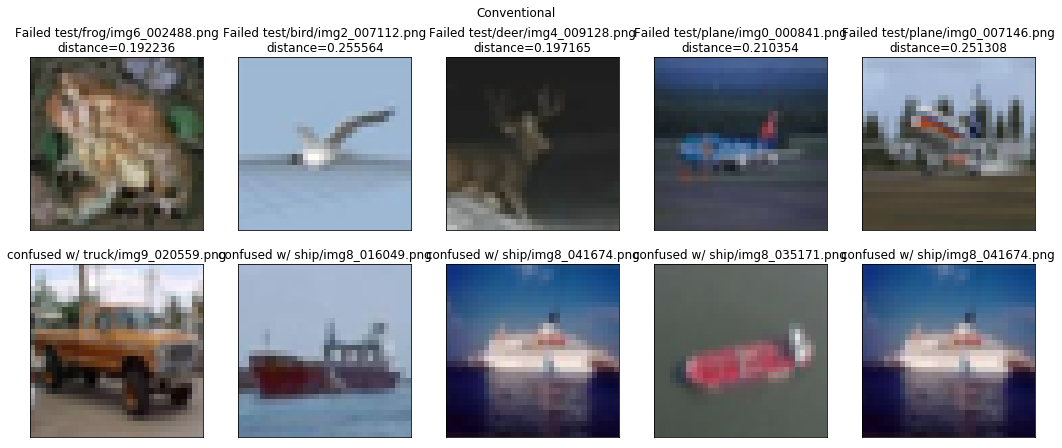

In [6]:
toytest.show_worst_test_images('Conventional', worst_test_info, 0)

## 2. L2-constrained Softmax Loss

- R. Ranjan, C. D. Castillo, and R. Chellappa. L2-constrained softmax loss for discriminative face verification. arXiv preprint arXiv:1703.09507, 2017. https://arxiv.org/pdf/1703.09507.pdf

epoch,train_loss,valid_loss,accuracy,time
0,2.273445,2.041334,0.262500,00:02


epoch,train_loss,valid_loss,accuracy,time
0,2.080907,1.927834,0.360417,00:02
1,1.978534,1.754731,0.435417,00:02
2,1.860641,1.582977,0.539583,00:02
3,1.752540,1.476144,0.579167,00:02
4,1.650476,1.437415,0.600000,00:02
5,1.564793,1.383009,0.614583,00:02
6,1.491708,1.376810,0.627083,00:02
7,1.427122,1.354951,0.631250,00:02
8,1.386510,1.352454,0.643750,00:02
9,1.356531,1.334158,0.641667,00:02


Better model found at epoch 0 with val_loss value: 1.9278337955474854.
Better model found at epoch 1 with val_loss value: 1.7547310590744019.
Better model found at epoch 2 with val_loss value: 1.582977294921875.
Better model found at epoch 3 with val_loss value: 1.4761441946029663.
Better model found at epoch 4 with val_loss value: 1.4374154806137085.
Better model found at epoch 5 with val_loss value: 1.3830088376998901.
Better model found at epoch 6 with val_loss value: 1.37680983543396.
Better model found at epoch 7 with val_loss value: 1.3549507856369019.
Better model found at epoch 8 with val_loss value: 1.3524537086486816.
Better model found at epoch 9 with val_loss value: 1.3341584205627441.


epoch,train_loss,valid_loss,accuracy,time
0,1.309806,1.323278,0.654167,00:02
1,1.309774,1.362442,0.641667,00:02
2,1.317295,1.384879,0.627083,00:02
3,1.320529,1.386784,0.612500,00:02
4,1.304972,1.375101,0.602083,00:02
5,1.276961,1.295363,0.656250,00:02
6,1.249523,1.328271,0.639583,00:02
7,1.220012,1.306013,0.660417,00:02
8,1.205271,1.300827,0.650000,00:02
9,1.192138,1.306136,0.654167,00:02


Better model found at epoch 0 with val_loss value: 1.3232783079147339.
Better model found at epoch 5 with val_loss value: 1.2953625917434692.


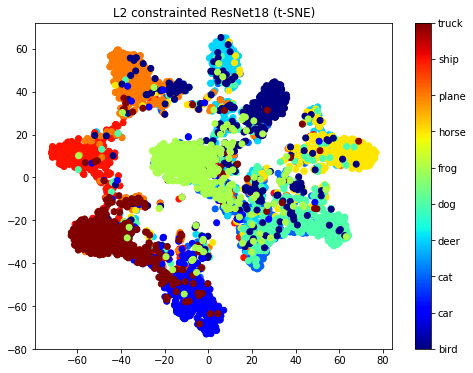

In [7]:
# Define model learner
class L2ConstrainedNet(nn.Module):
    def __init__(self, org_model, alpha=16, num_classes=1000):
        super().__init__()
        self.org_model = org_model
        self.alpha = alpha

    def forward(self, x):
        x = self.org_model(x)
        
        l2 = torch.sqrt((x**2).sum())
        x = self.alpha * (x / l2)
        return x

def learner_L2ConstrainedNet(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy).mixup()
    learn.model = L2ConstrainedNet(learn.model)
    learn.fit_one_cycle(1)
    learn.unfreeze()
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    return learn

if VISUALIZE_EMBEDDINGS:
    visualize_learner_embeddings(learner_L2ConstrainedNet(all_data), 'L2 constrained ResNet18 (t-SNE)', all_data)

In [8]:
toytest.do_tests('L2-constrained', learner_L2ConstrainedNet, delete_models=True)


Testing L2-constrained for case #0


epoch,train_loss,valid_loss,accuracy,time
0,1.079564,1.361086,0.540000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.751681,1.270382,0.510000,00:01
1,0.717820,0.816751,0.540000,00:01
2,0.669335,0.666449,0.620000,00:01
3,0.612712,0.685303,0.620000,00:01
4,0.573383,0.694979,0.665000,00:01
5,0.542322,0.573845,0.720000,00:01
6,0.513672,0.443153,0.815000,00:01
7,0.489028,0.379024,0.860000,00:01
8,0.477467,0.344854,0.880000,00:01
9,0.457100,0.328870,0.885000,00:01


Better model found at epoch 0 with val_loss value: 1.270382285118103.
Better model found at epoch 1 with val_loss value: 0.8167514204978943.
Better model found at epoch 2 with val_loss value: 0.6664491295814514.
Better model found at epoch 5 with val_loss value: 0.573845386505127.
Better model found at epoch 6 with val_loss value: 0.4431532323360443.
Better model found at epoch 7 with val_loss value: 0.37902435660362244.
Better model found at epoch 8 with val_loss value: 0.3448542654514313.
Better model found at epoch 9 with val_loss value: 0.32886964082717896.


epoch,train_loss,valid_loss,accuracy,time
0,0.347902,0.328297,0.870000,00:01
1,0.350231,0.318851,0.860000,00:01
2,0.330131,0.310097,0.875000,00:01
3,0.314916,0.290807,0.875000,00:01
4,0.311400,0.275248,0.880000,00:01
5,0.304890,0.267422,0.870000,00:01
6,0.296044,0.265982,0.890000,00:01
7,0.296036,0.268024,0.880000,00:01
8,0.299133,0.271943,0.875000,00:01
9,0.294238,0.272206,0.875000,00:01


Better model found at epoch 0 with val_loss value: 0.32829704880714417.
Better model found at epoch 1 with val_loss value: 0.3188512921333313.
Better model found at epoch 2 with val_loss value: 0.3100969195365906.
Better model found at epoch 3 with val_loss value: 0.29080730676651.
Better model found at epoch 4 with val_loss value: 0.2752479314804077.
Better model found at epoch 5 with val_loss value: 0.2674216032028198.
Better model found at epoch 6 with val_loss value: 0.2659820318222046.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing L2-constrained for case #1


epoch,train_loss,valid_loss,accuracy,time
0,0.939302,0.756817,0.640000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.756658,0.666845,0.675000,00:01
1,0.713375,0.405511,0.810000,00:01
2,0.645155,0.372396,0.830000,00:01
3,0.583842,0.351125,0.845000,00:01
4,0.539613,0.271658,0.895000,00:01
5,0.512418,0.246706,0.910000,00:01
6,0.484350,0.247693,0.905000,00:01
7,0.464548,0.258188,0.900000,00:01
8,0.446553,0.262426,0.890000,00:01
9,0.432545,0.273344,0.895000,00:01


Better model found at epoch 0 with val_loss value: 0.6668450236320496.
Better model found at epoch 1 with val_loss value: 0.4055114686489105.
Better model found at epoch 2 with val_loss value: 0.3723960220813751.
Better model found at epoch 3 with val_loss value: 0.35112464427948.
Better model found at epoch 4 with val_loss value: 0.2716578245162964.
Better model found at epoch 5 with val_loss value: 0.24670641124248505.


epoch,train_loss,valid_loss,accuracy,time
0,0.370913,0.250063,0.905000,00:01
1,0.379595,0.250793,0.915000,00:01
2,0.366275,0.241547,0.905000,00:01
3,0.340751,0.238231,0.905000,00:01
4,0.334316,0.239918,0.920000,00:01
5,0.325717,0.242566,0.925000,00:01
6,0.320740,0.244006,0.920000,00:01
7,0.312419,0.241758,0.925000,00:01
8,0.311563,0.239202,0.915000,00:01
9,0.305656,0.243030,0.925000,00:01


Better model found at epoch 0 with val_loss value: 0.2500627040863037.
Better model found at epoch 2 with val_loss value: 0.24154706299304962.
Better model found at epoch 3 with val_loss value: 0.23823139071464539.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing L2-constrained for case #2


epoch,train_loss,valid_loss,accuracy,time
0,1.278906,0.479436,0.790000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.732185,0.741973,0.725000,00:01
1,0.714006,0.615290,0.730000,00:01
2,0.662710,0.447152,0.805000,00:01
3,0.606616,0.523643,0.745000,00:01
4,0.558241,0.437554,0.805000,00:01
5,0.526616,0.329076,0.875000,00:01
6,0.486908,0.257394,0.930000,00:01
7,0.459357,0.229541,0.935000,00:01
8,0.436159,0.215513,0.935000,00:01
9,0.419523,0.214169,0.925000,00:01


Better model found at epoch 0 with val_loss value: 0.7419732809066772.
Better model found at epoch 1 with val_loss value: 0.6152896881103516.
Better model found at epoch 2 with val_loss value: 0.44715186953544617.
Better model found at epoch 4 with val_loss value: 0.4375535547733307.
Better model found at epoch 5 with val_loss value: 0.3290763795375824.
Better model found at epoch 6 with val_loss value: 0.2573935389518738.
Better model found at epoch 7 with val_loss value: 0.2295411080121994.
Better model found at epoch 8 with val_loss value: 0.21551309525966644.
Better model found at epoch 9 with val_loss value: 0.21416902542114258.


epoch,train_loss,valid_loss,accuracy,time
0,0.325629,0.212933,0.925000,00:01
1,0.307657,0.214345,0.920000,00:02
2,0.302387,0.212986,0.925000,00:01
3,0.301175,0.211298,0.925000,00:01
4,0.294508,0.211192,0.920000,00:01
5,0.295007,0.213014,0.905000,00:01
6,0.295774,0.212018,0.915000,00:01
7,0.283880,0.209037,0.920000,00:01
8,0.285757,0.210113,0.920000,00:01
9,0.282560,0.209041,0.910000,00:01


Better model found at epoch 0 with val_loss value: 0.21293264627456665.
Better model found at epoch 3 with val_loss value: 0.21129828691482544.
Better model found at epoch 4 with val_loss value: 0.21119233965873718.
Better model found at epoch 7 with val_loss value: 0.20903734862804413.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing L2-constrained for case #3


epoch,train_loss,valid_loss,accuracy,time
0,0.937165,0.772309,0.645000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.713706,0.861599,0.660000,00:01
1,0.691466,0.554320,0.740000,00:01
2,0.628099,0.692608,0.665000,00:01
3,0.595720,0.462660,0.770000,00:01
4,0.553485,0.376940,0.810000,00:01
5,0.519951,0.309940,0.880000,00:01
6,0.487658,0.288381,0.905000,00:01
7,0.465616,0.294506,0.905000,00:01
8,0.449762,0.312346,0.900000,00:01
9,0.440408,0.336974,0.890000,00:01


Better model found at epoch 0 with val_loss value: 0.8615992069244385.
Better model found at epoch 1 with val_loss value: 0.5543198585510254.
Better model found at epoch 3 with val_loss value: 0.462660014629364.
Better model found at epoch 4 with val_loss value: 0.37694042921066284.
Better model found at epoch 5 with val_loss value: 0.3099396228790283.
Better model found at epoch 6 with val_loss value: 0.2883814871311188.


epoch,train_loss,valid_loss,accuracy,time
0,0.345524,0.295874,0.905000,00:01
1,0.328879,0.306713,0.885000,00:01
2,0.331697,0.316532,0.870000,00:01
3,0.323122,0.326333,0.870000,00:01
4,0.320926,0.339297,0.885000,00:01
5,0.310748,0.348709,0.875000,00:01
6,0.309302,0.357722,0.875000,00:01
7,0.301700,0.349228,0.880000,00:01
8,0.299896,0.348058,0.880000,00:01
9,0.298169,0.350408,0.870000,00:01


Better model found at epoch 0 with val_loss value: 0.2958735227584839.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing L2-constrained for case #4


epoch,train_loss,valid_loss,accuracy,time
0,1.021716,0.771838,0.710000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.819399,0.555100,0.745000,00:01
1,0.750535,0.927110,0.600000,00:01
2,0.708241,0.798873,0.585000,00:01
3,0.650124,0.668703,0.630000,00:01
4,0.601260,0.636301,0.665000,00:01
5,0.569485,0.608478,0.695000,00:01
6,0.541527,0.535506,0.760000,00:01
7,0.516416,0.476945,0.780000,00:01
8,0.495451,0.425920,0.795000,00:01
9,0.480619,0.390614,0.840000,00:01


Better model found at epoch 0 with val_loss value: 0.5550999641418457.
Better model found at epoch 6 with val_loss value: 0.5355056524276733.
Better model found at epoch 7 with val_loss value: 0.47694504261016846.
Better model found at epoch 8 with val_loss value: 0.4259200394153595.
Better model found at epoch 9 with val_loss value: 0.3906138241291046.


epoch,train_loss,valid_loss,accuracy,time
0,0.391565,0.368940,0.855000,00:01
1,0.383011,0.348943,0.885000,00:01
2,0.364298,0.344393,0.890000,00:01
3,0.359644,0.328334,0.880000,00:01
4,0.348098,0.318480,0.870000,00:01
5,0.340012,0.317353,0.875000,00:01
6,0.336195,0.320143,0.880000,00:01
7,0.327481,0.318735,0.875000,00:01
8,0.322788,0.320029,0.875000,00:01
9,0.323068,0.322115,0.875000,00:01


Better model found at epoch 0 with val_loss value: 0.3689398467540741.
Better model found at epoch 1 with val_loss value: 0.34894314408302307.
Better model found at epoch 2 with val_loss value: 0.3443926274776459.
Better model found at epoch 3 with val_loss value: 0.32833394408226013.
Better model found at epoch 4 with val_loss value: 0.3184797763824463.
Better model found at epoch 5 with val_loss value: 0.31735336780548096.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing L2-constrained for case #5


epoch,train_loss,valid_loss,accuracy,time
0,0.925089,0.894226,0.650000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.661952,1.316262,0.550000,00:01
1,0.755258,1.069019,0.560000,00:01
2,0.712114,0.735344,0.640000,00:01
3,0.687930,0.652765,0.665000,00:01
4,0.649695,0.597831,0.715000,00:01
5,0.612890,0.537467,0.735000,00:01
6,0.574606,0.489558,0.755000,00:01
7,0.553430,0.470488,0.770000,00:01
8,0.543398,0.463076,0.760000,00:01
9,0.525084,0.463296,0.755000,00:01


Better model found at epoch 0 with val_loss value: 1.316261649131775.
Better model found at epoch 1 with val_loss value: 1.0690191984176636.
Better model found at epoch 2 with val_loss value: 0.7353437542915344.
Better model found at epoch 3 with val_loss value: 0.6527654528617859.
Better model found at epoch 4 with val_loss value: 0.597831130027771.
Better model found at epoch 5 with val_loss value: 0.5374665260314941.
Better model found at epoch 6 with val_loss value: 0.4895579218864441.
Better model found at epoch 7 with val_loss value: 0.4704882502555847.
Better model found at epoch 8 with val_loss value: 0.46307605504989624.


epoch,train_loss,valid_loss,accuracy,time
0,0.386597,0.463129,0.755000,00:01
1,0.384758,0.455971,0.780000,00:01
2,0.395287,0.454669,0.795000,00:01
3,0.384939,0.455449,0.785000,00:01
4,0.377918,0.449281,0.785000,00:01
5,0.374401,0.449744,0.790000,00:01
6,0.357833,0.453637,0.785000,00:01
7,0.353248,0.455511,0.785000,00:01
8,0.347033,0.451270,0.785000,00:01
9,0.339030,0.445862,0.785000,00:01


Better model found at epoch 0 with val_loss value: 0.46312859654426575.
Better model found at epoch 1 with val_loss value: 0.4559711217880249.
Better model found at epoch 2 with val_loss value: 0.45466914772987366.
Better model found at epoch 4 with val_loss value: 0.44928115606307983.
Better model found at epoch 9 with val_loss value: 0.44586193561553955.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing L2-constrained for case #6


epoch,train_loss,valid_loss,accuracy,time
0,1.006533,0.740254,0.615000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.732482,0.667152,0.625000,00:01
1,0.699077,0.671566,0.570000,00:01
2,0.642151,0.662849,0.570000,00:01
3,0.599066,0.619277,0.630000,00:01
4,0.555421,0.603548,0.635000,00:01
5,0.521407,0.580326,0.700000,00:01
6,0.500118,0.542596,0.760000,00:01
7,0.484386,0.516423,0.760000,00:01
8,0.468539,0.483607,0.760000,00:01
9,0.455008,0.473452,0.775000,00:01


Better model found at epoch 0 with val_loss value: 0.6671516299247742.
Better model found at epoch 2 with val_loss value: 0.6628494262695312.
Better model found at epoch 3 with val_loss value: 0.6192771792411804.
Better model found at epoch 4 with val_loss value: 0.6035481095314026.
Better model found at epoch 5 with val_loss value: 0.5803261399269104.
Better model found at epoch 6 with val_loss value: 0.5425955653190613.
Better model found at epoch 7 with val_loss value: 0.5164234042167664.
Better model found at epoch 8 with val_loss value: 0.4836070239543915.
Better model found at epoch 9 with val_loss value: 0.4734518527984619.


epoch,train_loss,valid_loss,accuracy,time
0,0.345621,0.453246,0.795000,00:01
1,0.350519,0.432384,0.810000,00:01
2,0.355604,0.410275,0.795000,00:01
3,0.348806,0.402644,0.800000,00:01
4,0.336250,0.391294,0.800000,00:01
5,0.330214,0.378075,0.810000,00:01
6,0.316400,0.381792,0.805000,00:01
7,0.312676,0.387686,0.790000,00:01
8,0.308208,0.390962,0.785000,00:01
9,0.301914,0.385144,0.785000,00:01


Better model found at epoch 0 with val_loss value: 0.45324596762657166.
Better model found at epoch 1 with val_loss value: 0.4323843717575073.
Better model found at epoch 2 with val_loss value: 0.41027531027793884.
Better model found at epoch 3 with val_loss value: 0.40264445543289185.
Better model found at epoch 4 with val_loss value: 0.3912941813468933.
Better model found at epoch 5 with val_loss value: 0.3780748248100281.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing L2-constrained for case #7


epoch,train_loss,valid_loss,accuracy,time
0,0.964947,1.046183,0.545000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.717637,0.805737,0.550000,00:01
1,0.730883,0.506491,0.795000,00:01
2,0.659573,0.505378,0.800000,00:01
3,0.603258,0.464249,0.815000,00:01
4,0.561753,0.452788,0.810000,00:01
5,0.535155,0.397403,0.840000,00:01
6,0.505538,0.360977,0.865000,00:01
7,0.480346,0.336214,0.860000,00:01
8,0.457860,0.332610,0.870000,00:01
9,0.439606,0.332842,0.875000,00:01


Better model found at epoch 0 with val_loss value: 0.805736780166626.
Better model found at epoch 1 with val_loss value: 0.5064910650253296.
Better model found at epoch 2 with val_loss value: 0.5053783655166626.
Better model found at epoch 3 with val_loss value: 0.46424880623817444.
Better model found at epoch 4 with val_loss value: 0.45278751850128174.
Better model found at epoch 5 with val_loss value: 0.3974026143550873.
Better model found at epoch 6 with val_loss value: 0.3609769940376282.
Better model found at epoch 7 with val_loss value: 0.33621418476104736.
Better model found at epoch 8 with val_loss value: 0.33261048793792725.


epoch,train_loss,valid_loss,accuracy,time
0,0.355855,0.328686,0.875000,00:01
1,0.326141,0.317568,0.880000,00:01
2,0.328919,0.306564,0.880000,00:01
3,0.324640,0.304508,0.885000,00:01
4,0.323818,0.308283,0.880000,00:01
5,0.316668,0.298952,0.885000,00:01
6,0.312420,0.293068,0.885000,00:01
7,0.303598,0.287291,0.895000,00:01
8,0.298053,0.289991,0.890000,00:01
9,0.297494,0.288896,0.885000,00:01


Better model found at epoch 0 with val_loss value: 0.3286857306957245.
Better model found at epoch 1 with val_loss value: 0.3175676465034485.
Better model found at epoch 2 with val_loss value: 0.3065640926361084.
Better model found at epoch 3 with val_loss value: 0.30450814962387085.
Better model found at epoch 5 with val_loss value: 0.29895246028900146.
Better model found at epoch 6 with val_loss value: 0.2930680513381958.
Better model found at epoch 7 with val_loss value: 0.28729090094566345.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing L2-constrained for case #8


epoch,train_loss,valid_loss,accuracy,time
0,0.954714,1.103687,0.540000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.695705,1.171945,0.550000,00:01
1,0.666808,0.632076,0.705000,00:01
2,0.615557,0.423044,0.805000,00:01
3,0.571434,0.403514,0.840000,00:01
4,0.528171,0.401121,0.865000,00:01
5,0.491044,0.377571,0.860000,00:01
6,0.467013,0.325531,0.890000,00:02
7,0.449655,0.285270,0.885000,00:01
8,0.432830,0.276141,0.885000,00:01
9,0.422265,0.280311,0.890000,00:01


Better model found at epoch 0 with val_loss value: 1.1719450950622559.
Better model found at epoch 1 with val_loss value: 0.6320757865905762.
Better model found at epoch 2 with val_loss value: 0.4230441749095917.
Better model found at epoch 3 with val_loss value: 0.40351417660713196.
Better model found at epoch 4 with val_loss value: 0.40112054347991943.
Better model found at epoch 5 with val_loss value: 0.3775714039802551.
Better model found at epoch 6 with val_loss value: 0.3255305588245392.
Better model found at epoch 7 with val_loss value: 0.2852696180343628.
Better model found at epoch 8 with val_loss value: 0.27614086866378784.


epoch,train_loss,valid_loss,accuracy,time
0,0.335979,0.271518,0.895000,00:01
1,0.317658,0.261276,0.895000,00:01
2,0.320861,0.241839,0.920000,00:01
3,0.315993,0.240786,0.915000,00:01
4,0.316173,0.240036,0.915000,00:01
5,0.319547,0.243248,0.920000,00:01
6,0.316303,0.246122,0.925000,00:01
7,0.309923,0.244779,0.910000,00:01
8,0.306767,0.246599,0.920000,00:01
9,0.303153,0.247702,0.920000,00:01


Better model found at epoch 0 with val_loss value: 0.2715178430080414.
Better model found at epoch 1 with val_loss value: 0.2612764835357666.
Better model found at epoch 2 with val_loss value: 0.2418394237756729.
Better model found at epoch 3 with val_loss value: 0.24078616499900818.
Better model found at epoch 4 with val_loss value: 0.24003592133522034.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing L2-constrained for case #9


epoch,train_loss,valid_loss,accuracy,time
0,1.049328,0.781524,0.620000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.846715,0.782141,0.505000,00:01
1,0.850017,0.678594,0.510000,00:01
2,0.770104,0.642137,0.580000,00:01
3,0.717088,0.634587,0.620000,00:01
4,0.666195,0.635513,0.615000,00:01
5,0.622579,0.647517,0.625000,00:01
6,0.592950,0.652271,0.650000,00:01
7,0.565498,0.657170,0.670000,00:01
8,0.540390,0.639512,0.705000,00:01
9,0.518678,0.614108,0.720000,00:01


Better model found at epoch 0 with val_loss value: 0.7821413278579712.
Better model found at epoch 1 with val_loss value: 0.6785941123962402.
Better model found at epoch 2 with val_loss value: 0.6421365141868591.
Better model found at epoch 3 with val_loss value: 0.6345871090888977.
Better model found at epoch 9 with val_loss value: 0.6141082644462585.


epoch,train_loss,valid_loss,accuracy,time
0,0.426979,0.603428,0.730000,00:01
1,0.395994,0.578646,0.765000,00:01
2,0.378785,0.557055,0.755000,00:01
3,0.360754,0.555714,0.760000,00:01
4,0.357740,0.555895,0.770000,00:01
5,0.349306,0.569127,0.755000,00:01
6,0.341658,0.572562,0.765000,00:01
7,0.330245,0.571997,0.775000,00:01
8,0.326984,0.572460,0.780000,00:01
9,0.320550,0.570093,0.780000,00:01


Better model found at epoch 0 with val_loss value: 0.6034278273582458.
Better model found at epoch 1 with val_loss value: 0.5786463022232056.
Better model found at epoch 2 with val_loss value: 0.5570554137229919.
Better model found at epoch 3 with val_loss value: 0.5557138919830322.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)
Deleting *.pth under /home/blmdr/lab/metric_learning/data_CIFAR10/images...


## 3. ArcFace

- J. Deng, J. Guo, and S. Zafeiriou. Arcface: Additive angular margin loss for deep face recognition. arXiv preprint arXiv:1801.07698, 2018. https://arxiv.org/pdf/1801.07698.pdf
- Pytorch implementation: https://github.com/ronghuaiyang/arcface-pytorch

In [9]:
try:
    from metrics import *
except:
    ! wget https://raw.githubusercontent.com/ronghuaiyang/arcface-pytorch/master/models/metrics.py
    from metrics import *

epoch,train_loss,valid_loss,accuracy,time
0,16.753267,16.174269,0.000000,00:02


epoch,train_loss,valid_loss,accuracy,time
0,16.329727,16.177126,0.000000,00:02
1,15.949892,15.448440,0.000000,00:02
2,15.089074,13.642253,0.154167,00:02
3,13.321676,11.890173,0.343750,00:02
4,11.278561,11.981389,0.416667,00:02
5,9.339026,11.641094,0.489583,00:02
6,7.582066,11.234753,0.504167,00:02
7,6.188936,10.747424,0.525000,00:02
8,5.200220,10.815547,0.529167,00:02
9,4.381144,10.697702,0.539583,00:02


Better model found at epoch 0 with val_loss value: 16.177125930786133.
Better model found at epoch 1 with val_loss value: 15.448439598083496.
Better model found at epoch 2 with val_loss value: 13.642252922058105.
Better model found at epoch 3 with val_loss value: 11.890172958374023.
Better model found at epoch 5 with val_loss value: 11.641094207763672.
Better model found at epoch 6 with val_loss value: 11.234752655029297.
Better model found at epoch 7 with val_loss value: 10.747424125671387.
Better model found at epoch 9 with val_loss value: 10.697702407836914.


epoch,train_loss,valid_loss,accuracy,time
0,3.473358,10.957408,0.535417,00:02
1,3.363337,11.612427,0.516667,00:02
2,3.857663,13.063513,0.506250,00:02
3,4.218807,12.946157,0.502083,00:02
4,4.073591,11.972540,0.558333,00:02
5,3.670610,13.142818,0.522917,00:02
6,2.963841,12.657147,0.541667,00:02
7,2.509098,12.259624,0.558333,00:02
8,2.027709,12.209914,0.558333,00:02
9,1.659304,12.176849,0.558333,00:02


Better model found at epoch 0 with val_loss value: 10.95740795135498.


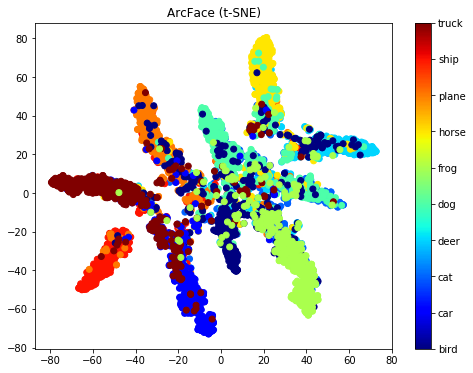

In [10]:
class LabelCatcher(LearnerCallback):
    last_labels = None

    def __init__(self, learn:Learner):
        super().__init__(learn)
        
    def on_batch_begin(self, last_input, last_target, train, **kwargs):
        LabelCatcher.last_labels = last_target
        return {'last_input': last_input, 'last_target': last_target} 


class XFaceNet(nn.Module):
    def __init__(self, org_model, data, xface_product=ArcMarginProduct, m=0.5):
        super().__init__()
        self.org_model = org_model
        self.feature_model = body_feature_model(org_model)
        self.metric_fc = xface_product(512, data.c, m=m).cuda()
    
    def forward(self, x):
        x = self.feature_model(x)
        x = self.metric_fc(x, LabelCatcher.last_labels)
        return x


def learner_ArcFace(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy)
    learn.model = XFaceNet(learn.model, train_data, ArcMarginProduct, m=0.5)
    learn.callback_fns.append(partial(LabelCatcher))
    learn.fit_one_cycle(1)
    learn.unfreeze()
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    return learn

if VISUALIZE_EMBEDDINGS:
    visualize_learner_embeddings(learner_ArcFace(all_data), 'ArcFace (t-SNE)', all_data)

In [11]:
toytest.do_tests('ArcFace', learner_ArcFace, delete_models=True)


Testing ArcFace for case #0


epoch,train_loss,valid_loss,accuracy,time
0,14.397841,12.857291,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,13.363930,12.474590,0.000000,00:01
1,13.000919,11.256927,0.000000,00:01
2,12.230949,9.270283,0.230000,00:01
3,10.613499,7.004665,0.535000,00:01
4,9.050858,5.389081,0.690000,00:01
5,7.605505,4.288047,0.785000,00:01
6,6.581965,3.811558,0.790000,00:01
7,5.709946,3.592784,0.800000,00:01
8,5.030993,3.590314,0.800000,00:01
9,4.470484,3.634605,0.770000,00:01


Better model found at epoch 0 with val_loss value: 12.474590301513672.
Better model found at epoch 1 with val_loss value: 11.256927490234375.
Better model found at epoch 2 with val_loss value: 9.270282745361328.
Better model found at epoch 3 with val_loss value: 7.004664897918701.
Better model found at epoch 4 with val_loss value: 5.3890814781188965.
Better model found at epoch 5 with val_loss value: 4.2880473136901855.
Better model found at epoch 6 with val_loss value: 3.8115575313568115.
Better model found at epoch 7 with val_loss value: 3.5927844047546387.
Better model found at epoch 8 with val_loss value: 3.590313673019409.


epoch,train_loss,valid_loss,accuracy,time
0,1.035035,3.716732,0.775000,00:01
1,1.021417,3.774780,0.765000,00:01
2,0.787259,3.580434,0.785000,00:01
3,0.662004,3.563388,0.795000,00:01
4,0.583568,3.577703,0.810000,00:01
5,0.535357,3.667739,0.810000,00:01
6,0.474721,3.575322,0.810000,00:01
7,0.411448,3.497921,0.790000,00:01
8,0.364315,3.510442,0.785000,00:01
9,0.336846,3.494447,0.785000,00:01


Better model found at epoch 0 with val_loss value: 3.7167322635650635.
Better model found at epoch 2 with val_loss value: 3.5804343223571777.
Better model found at epoch 3 with val_loss value: 3.563387870788574.
Better model found at epoch 7 with val_loss value: 3.4979207515716553.
Better model found at epoch 9 with val_loss value: 3.4944465160369873.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ArcFace for case #1


epoch,train_loss,valid_loss,accuracy,time
0,14.131806,12.634067,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,13.115693,12.012264,0.000000,00:01
1,12.723024,10.224456,0.000000,00:01
2,11.838881,5.715151,0.290000,00:01
3,10.232494,2.620629,0.735000,00:01
4,8.449594,1.615201,0.845000,00:01
5,7.062205,1.238299,0.910000,00:01
6,5.992769,1.161198,0.915000,00:01
7,5.199908,1.054435,0.895000,00:01
8,4.540884,1.169638,0.875000,00:01
9,4.012685,1.280304,0.875000,00:01


Better model found at epoch 0 with val_loss value: 12.012264251708984.
Better model found at epoch 1 with val_loss value: 10.224455833435059.
Better model found at epoch 2 with val_loss value: 5.715150833129883.
Better model found at epoch 3 with val_loss value: 2.620628595352173.
Better model found at epoch 4 with val_loss value: 1.6152012348175049.
Better model found at epoch 5 with val_loss value: 1.2382991313934326.
Better model found at epoch 6 with val_loss value: 1.161198377609253.
Better model found at epoch 7 with val_loss value: 1.0544350147247314.


epoch,train_loss,valid_loss,accuracy,time
0,0.294129,1.160247,0.875000,00:01
1,0.258823,1.254302,0.880000,00:02
2,0.218740,1.310370,0.885000,00:01
3,0.230517,1.229158,0.900000,00:01
4,0.200197,1.329765,0.890000,00:01
5,0.270769,1.389149,0.875000,00:01
6,0.241669,1.405417,0.865000,00:01
7,0.209691,1.483680,0.860000,00:01
8,0.193862,1.514266,0.850000,00:01
9,0.175397,1.500857,0.855000,00:01


Better model found at epoch 0 with val_loss value: 1.1602474451065063.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ArcFace for case #2


epoch,train_loss,valid_loss,accuracy,time
0,14.228840,12.153747,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,12.907332,11.563821,0.000000,00:01
1,12.483712,10.927276,0.355000,00:01
2,10.931064,13.443791,0.490000,00:01
3,8.793018,12.699244,0.535000,00:01
4,6.961996,9.426504,0.595000,00:01
5,5.727115,5.034421,0.705000,00:01
6,4.814043,2.724204,0.800000,00:01
7,4.102893,1.904558,0.870000,00:01
8,3.598979,1.724067,0.890000,00:01
9,3.169097,1.802590,0.890000,00:01


Better model found at epoch 0 with val_loss value: 11.563820838928223.
Better model found at epoch 1 with val_loss value: 10.927275657653809.
Better model found at epoch 4 with val_loss value: 9.426504135131836.
Better model found at epoch 5 with val_loss value: 5.034421443939209.
Better model found at epoch 6 with val_loss value: 2.724203586578369.
Better model found at epoch 7 with val_loss value: 1.9045580625534058.
Better model found at epoch 8 with val_loss value: 1.7240667343139648.


epoch,train_loss,valid_loss,accuracy,time
0,0.142582,1.763505,0.890000,00:01
1,0.182085,1.778825,0.890000,00:01
2,0.169635,1.802449,0.890000,00:01
3,0.184431,1.853791,0.895000,00:01
4,0.185191,1.880803,0.895000,00:01
5,0.193418,1.973255,0.890000,00:01
6,0.201876,1.826592,0.870000,00:01
7,0.194350,1.877640,0.880000,00:01
8,0.190799,1.928638,0.875000,00:01
9,0.195541,1.906413,0.890000,00:01


Better model found at epoch 0 with val_loss value: 1.763505458831787.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ArcFace for case #3


epoch,train_loss,valid_loss,accuracy,time
0,14.102119,12.798770,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,13.443664,11.914595,0.000000,00:01
1,13.025344,10.762926,0.065000,00:01
2,12.088051,10.774685,0.440000,00:01
3,10.316585,9.905569,0.535000,00:01
4,8.531943,6.784814,0.645000,00:01
5,7.141442,3.840940,0.710000,00:01
6,6.023542,2.810513,0.805000,00:02
7,5.178831,2.722296,0.790000,00:01
8,4.497644,2.821448,0.775000,00:01
9,3.951492,2.980624,0.770000,00:01


Better model found at epoch 0 with val_loss value: 11.914594650268555.
Better model found at epoch 1 with val_loss value: 10.76292610168457.
Better model found at epoch 3 with val_loss value: 9.905569076538086.
Better model found at epoch 4 with val_loss value: 6.784814357757568.
Better model found at epoch 5 with val_loss value: 3.840939521789551.
Better model found at epoch 6 with val_loss value: 2.810513496398926.
Better model found at epoch 7 with val_loss value: 2.7222964763641357.


epoch,train_loss,valid_loss,accuracy,time
0,0.343419,2.815829,0.795000,00:01
1,0.333197,2.891015,0.800000,00:01
2,0.302797,3.489031,0.790000,00:01
3,0.255486,3.949880,0.790000,00:01
4,0.232509,3.984688,0.795000,00:01
5,0.206080,3.831086,0.790000,00:01
6,0.179533,3.752686,0.795000,00:01
7,0.172059,3.773564,0.785000,00:01
8,0.184577,3.795251,0.785000,00:01
9,0.168706,3.787741,0.780000,00:01


Better model found at epoch 0 with val_loss value: 2.815829277038574.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ArcFace for case #4


epoch,train_loss,valid_loss,accuracy,time
0,14.321421,12.501286,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,13.398890,12.207273,0.025000,00:01
1,12.862836,12.745653,0.460000,00:01
2,11.648200,15.679509,0.505000,00:01
3,9.638065,16.071795,0.525000,00:01
4,7.967888,15.552438,0.530000,00:01
5,6.703611,13.666551,0.555000,00:01
6,5.715155,11.094601,0.590000,00:01
7,4.905625,9.122707,0.645000,00:01
8,4.309424,7.777098,0.635000,00:01
9,3.869127,7.090146,0.655000,00:01


Better model found at epoch 0 with val_loss value: 12.20727252960205.
Better model found at epoch 6 with val_loss value: 11.094600677490234.
Better model found at epoch 7 with val_loss value: 9.12270736694336.
Better model found at epoch 8 with val_loss value: 7.777097702026367.
Better model found at epoch 9 with val_loss value: 7.090146064758301.


epoch,train_loss,valid_loss,accuracy,time
0,0.790289,6.345708,0.675000,00:01
1,0.633352,5.786763,0.705000,00:01
2,0.477185,5.497822,0.715000,00:01
3,0.451877,5.225817,0.735000,00:01
4,0.440552,4.575738,0.760000,00:01
5,0.394475,4.205987,0.765000,00:01
6,0.360041,4.105300,0.755000,00:01
7,0.344488,4.078407,0.755000,00:01
8,0.307028,4.124857,0.750000,00:01
9,0.292296,4.184695,0.755000,00:01


Better model found at epoch 0 with val_loss value: 6.345707893371582.
Better model found at epoch 1 with val_loss value: 5.7867631912231445.
Better model found at epoch 2 with val_loss value: 5.497822284698486.
Better model found at epoch 3 with val_loss value: 5.22581672668457.
Better model found at epoch 4 with val_loss value: 4.575737953186035.
Better model found at epoch 5 with val_loss value: 4.205987453460693.
Better model found at epoch 6 with val_loss value: 4.105300426483154.
Better model found at epoch 7 with val_loss value: 4.078406810760498.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ArcFace for case #5


epoch,train_loss,valid_loss,accuracy,time
0,14.033403,12.643232,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,13.712489,12.261487,0.000000,00:01
1,13.337339,11.586978,0.195000,00:01
2,12.533071,12.461822,0.485000,00:01
3,10.844963,11.948236,0.565000,00:01
4,9.250641,11.211562,0.595000,00:01
5,7.888263,9.369711,0.630000,00:01
6,6.858813,8.489235,0.660000,00:01
7,5.951208,7.931811,0.650000,00:01
8,5.344717,7.420607,0.645000,00:01
9,4.740379,7.123516,0.635000,00:01


Better model found at epoch 0 with val_loss value: 12.261487007141113.
Better model found at epoch 1 with val_loss value: 11.5869779586792.
Better model found at epoch 4 with val_loss value: 11.211562156677246.
Better model found at epoch 5 with val_loss value: 9.369710922241211.
Better model found at epoch 6 with val_loss value: 8.489234924316406.
Better model found at epoch 7 with val_loss value: 7.9318108558654785.
Better model found at epoch 8 with val_loss value: 7.42060661315918.
Better model found at epoch 9 with val_loss value: 7.123515605926514.


epoch,train_loss,valid_loss,accuracy,time
0,0.684563,6.980150,0.640000,00:01
1,0.712048,6.677708,0.655000,00:01
2,0.675462,6.272393,0.680000,00:01
3,0.579022,6.242486,0.665000,00:01
4,0.537340,6.228707,0.680000,00:01
5,0.458313,6.267245,0.670000,00:01
6,0.427673,6.497054,0.665000,00:01
7,0.417435,6.504825,0.675000,00:01
8,0.403791,6.428732,0.670000,00:01
9,0.419290,6.409345,0.670000,00:01


Better model found at epoch 0 with val_loss value: 6.98015022277832.
Better model found at epoch 1 with val_loss value: 6.677707672119141.
Better model found at epoch 2 with val_loss value: 6.272392749786377.
Better model found at epoch 3 with val_loss value: 6.242485523223877.
Better model found at epoch 4 with val_loss value: 6.2287068367004395.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ArcFace for case #6


epoch,train_loss,valid_loss,accuracy,time
0,13.921774,12.692257,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,13.213341,12.951138,0.035000,00:01
1,12.741426,13.604212,0.345000,00:01
2,11.391745,16.091351,0.480000,00:01
3,9.560779,16.642900,0.495000,00:01
4,7.859482,14.729483,0.520000,00:01
5,6.485781,12.343589,0.570000,00:01
6,5.508371,10.189010,0.600000,00:01
7,4.751322,8.403072,0.650000,00:01
8,4.170595,7.331175,0.645000,00:01
9,3.683345,6.703508,0.665000,00:01


Better model found at epoch 0 with val_loss value: 12.951138496398926.
Better model found at epoch 5 with val_loss value: 12.343588829040527.
Better model found at epoch 6 with val_loss value: 10.189009666442871.
Better model found at epoch 7 with val_loss value: 8.403072357177734.
Better model found at epoch 8 with val_loss value: 7.331175327301025.
Better model found at epoch 9 with val_loss value: 6.703507900238037.


epoch,train_loss,valid_loss,accuracy,time
0,0.394543,6.217255,0.680000,00:01
1,0.413861,5.904469,0.720000,00:01
2,0.371405,5.341325,0.725000,00:01
3,0.394418,4.860101,0.725000,00:01
4,0.336426,5.087060,0.745000,00:01
5,0.332732,5.213675,0.750000,00:01
6,0.289948,4.968739,0.765000,00:01
7,0.253434,5.009141,0.745000,00:01
8,0.246977,5.143838,0.740000,00:01
9,0.225263,5.136634,0.745000,00:01


Better model found at epoch 0 with val_loss value: 6.217255115509033.
Better model found at epoch 1 with val_loss value: 5.904469013214111.
Better model found at epoch 2 with val_loss value: 5.341325283050537.
Better model found at epoch 3 with val_loss value: 4.860100746154785.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ArcFace for case #7


epoch,train_loss,valid_loss,accuracy,time
0,14.131372,12.487389,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,13.307947,11.893398,0.000000,00:01
1,12.955630,10.699590,0.000000,00:01
2,12.133083,7.926854,0.270000,00:01
3,10.416672,5.126325,0.635000,00:01
4,8.652044,4.555500,0.770000,00:01
5,7.212057,4.347249,0.810000,00:01
6,6.128584,4.280497,0.810000,00:01
7,5.283232,4.322564,0.805000,00:01
8,4.591482,4.347914,0.805000,00:01
9,4.029674,4.221116,0.800000,00:01


Better model found at epoch 0 with val_loss value: 11.89339828491211.
Better model found at epoch 1 with val_loss value: 10.699589729309082.
Better model found at epoch 2 with val_loss value: 7.926854133605957.
Better model found at epoch 3 with val_loss value: 5.126324653625488.
Better model found at epoch 4 with val_loss value: 4.555500030517578.
Better model found at epoch 5 with val_loss value: 4.3472490310668945.
Better model found at epoch 6 with val_loss value: 4.280496597290039.
Better model found at epoch 9 with val_loss value: 4.221116065979004.


epoch,train_loss,valid_loss,accuracy,time
0,0.192903,4.097309,0.790000,00:01
1,0.228543,3.868840,0.790000,00:01
2,0.250674,3.572745,0.810000,00:01
3,0.385904,3.416875,0.800000,00:01
4,0.342399,3.554827,0.800000,00:01
5,0.303499,3.737016,0.790000,00:01
6,0.301312,3.657570,0.795000,00:01
7,0.264982,3.286032,0.795000,00:01
8,0.268644,3.062760,0.820000,00:01
9,0.242283,2.876076,0.820000,00:01


Better model found at epoch 0 with val_loss value: 4.097309112548828.
Better model found at epoch 1 with val_loss value: 3.8688395023345947.
Better model found at epoch 2 with val_loss value: 3.5727450847625732.
Better model found at epoch 3 with val_loss value: 3.416874885559082.
Better model found at epoch 7 with val_loss value: 3.286032199859619.
Better model found at epoch 8 with val_loss value: 3.0627596378326416.
Better model found at epoch 9 with val_loss value: 2.8760759830474854.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ArcFace for case #8


epoch,train_loss,valid_loss,accuracy,time
0,14.430435,13.370131,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,13.436872,12.786986,0.000000,00:01
1,13.087438,11.244776,0.000000,00:01
2,12.170827,7.224076,0.125000,00:01
3,10.442126,4.044216,0.625000,00:01
4,8.609965,3.154867,0.770000,00:01
5,7.174400,2.757330,0.815000,00:01
6,6.100005,2.376000,0.825000,00:01
7,5.232406,2.057973,0.840000,00:01
8,4.555371,1.970094,0.830000,00:01
9,4.017859,2.062839,0.820000,00:01


Better model found at epoch 0 with val_loss value: 12.786986351013184.
Better model found at epoch 1 with val_loss value: 11.244775772094727.
Better model found at epoch 2 with val_loss value: 7.224075794219971.
Better model found at epoch 3 with val_loss value: 4.044216156005859.
Better model found at epoch 4 with val_loss value: 3.154867172241211.
Better model found at epoch 5 with val_loss value: 2.7573304176330566.
Better model found at epoch 6 with val_loss value: 2.375999689102173.
Better model found at epoch 7 with val_loss value: 2.0579726696014404.
Better model found at epoch 8 with val_loss value: 1.9700942039489746.


epoch,train_loss,valid_loss,accuracy,time
0,0.513379,2.038163,0.825000,00:01
1,0.348402,2.082371,0.815000,00:01
2,0.311659,2.199421,0.815000,00:01
3,0.261453,2.249923,0.835000,00:01
4,0.254132,2.339055,0.835000,00:01
5,0.225224,2.374591,0.835000,00:01
6,0.203702,2.419382,0.830000,00:01
7,0.194805,2.457442,0.830000,00:01
8,0.179409,2.552271,0.815000,00:01
9,0.171666,2.564984,0.820000,00:01


Better model found at epoch 0 with val_loss value: 2.038163423538208.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ArcFace for case #9


epoch,train_loss,valid_loss,accuracy,time
0,14.161520,13.823562,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,13.493368,13.473593,0.000000,00:01
1,13.214573,13.438048,0.255000,00:01
2,12.435742,15.318171,0.470000,00:01
3,10.639607,15.401449,0.480000,00:01
4,8.865236,13.200381,0.510000,00:01
5,7.360227,10.543239,0.515000,00:01
6,6.279465,9.105912,0.560000,00:01
7,5.436508,8.371592,0.540000,00:01
8,4.756905,7.991649,0.595000,00:01
9,4.213868,7.681713,0.560000,00:01


Better model found at epoch 0 with val_loss value: 13.473592758178711.
Better model found at epoch 1 with val_loss value: 13.438048362731934.
Better model found at epoch 4 with val_loss value: 13.2003812789917.
Better model found at epoch 5 with val_loss value: 10.543238639831543.
Better model found at epoch 6 with val_loss value: 9.105912208557129.
Better model found at epoch 7 with val_loss value: 8.371591567993164.
Better model found at epoch 8 with val_loss value: 7.991649150848389.
Better model found at epoch 9 with val_loss value: 7.681712627410889.


epoch,train_loss,valid_loss,accuracy,time
0,0.541316,7.635429,0.575000,00:01
1,0.630717,7.686122,0.590000,00:01
2,0.483533,7.659383,0.605000,00:01
3,0.477495,7.492227,0.640000,00:01
4,0.417825,6.900498,0.655000,00:01
5,0.368747,6.392534,0.690000,00:01
6,0.338131,6.121735,0.695000,00:01
7,0.320655,6.041795,0.695000,00:01
8,0.355140,6.014507,0.700000,00:01
9,0.334013,5.980607,0.705000,00:01


Better model found at epoch 0 with val_loss value: 7.6354289054870605.
Better model found at epoch 3 with val_loss value: 7.492227077484131.
Better model found at epoch 4 with val_loss value: 6.900497913360596.
Better model found at epoch 5 with val_loss value: 6.392534255981445.
Better model found at epoch 6 with val_loss value: 6.121735095977783.
Better model found at epoch 7 with val_loss value: 6.041795253753662.
Better model found at epoch 8 with val_loss value: 6.014507293701172.
Better model found at epoch 9 with val_loss value: 5.980606555938721.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)
Deleting *.pth under /home/blmdr/lab/metric_learning/data_CIFAR10/images...


## 4. CosFace
- H. Wang, Y. Wang, Z. Zhou, X. Ji, D. Gong, J. Zhou, Z. Li, and W. Liu, CosFace: Large Margin Cosine Loss for Deep Face Recognition, arXiv preprint arXiv:1801.09414, 2018. https://arxiv.org/pdf/1801.09414.pdf
- Pytorch implementation: https://github.com/ronghuaiyang/arcface-pytorch

epoch,train_loss,valid_loss,accuracy,time
0,14.357939,13.939656,0.000000,00:02


epoch,train_loss,valid_loss,accuracy,time
0,13.768762,13.660232,0.000000,00:02
1,13.481515,12.877660,0.000000,00:02
2,12.573506,12.879499,0.170833,00:02
3,11.078902,10.408580,0.366667,00:02
4,9.356256,10.057583,0.447917,00:02
5,7.678718,9.549912,0.495833,00:02
6,6.168388,10.340112,0.493750,00:02
7,4.930959,10.027690,0.512500,00:02
8,4.013481,9.883459,0.525000,00:02
9,3.429852,9.911615,0.525000,00:02


Better model found at epoch 0 with val_loss value: 13.660231590270996.
Better model found at epoch 1 with val_loss value: 12.877659797668457.
Better model found at epoch 3 with val_loss value: 10.40857982635498.
Better model found at epoch 4 with val_loss value: 10.05758285522461.
Better model found at epoch 5 with val_loss value: 9.549912452697754.


epoch,train_loss,valid_loss,accuracy,time
0,4.481039,9.827801,0.493750,00:02
1,4.084880,10.277516,0.504167,00:02
2,3.819726,10.677639,0.491667,00:02
3,3.850747,11.080997,0.508333,00:02
4,3.654856,10.369363,0.535417,00:02
5,3.236079,10.459699,0.545833,00:02
6,2.670131,10.016407,0.566667,00:02
7,2.058168,10.000067,0.564583,00:02
8,1.674176,9.989207,0.566667,00:02
9,1.387846,10.055938,0.558333,00:02


Better model found at epoch 0 with val_loss value: 9.827800750732422.


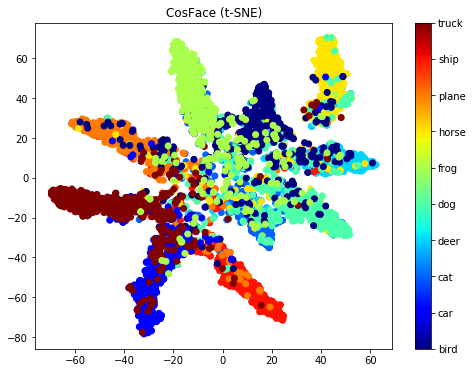

In [12]:
def learner_CosFace(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy)
    learn.model = XFaceNet(learn.model, train_data, AddMarginProduct, m=0.4)
    learn.callback_fns.append(partial(LabelCatcher))
    learn.fit_one_cycle(1)
    learn.unfreeze()
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    return learn

if VISUALIZE_EMBEDDINGS:
    visualize_learner_embeddings(learner_CosFace(all_data), 'CosFace (t-SNE)', all_data)

In [13]:
toytest.do_tests('CosFace', learner_CosFace, delete_models=True)


Testing CosFace for case #0


epoch,train_loss,valid_loss,accuracy,time
0,11.875466,10.789762,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,10.864709,10.631366,0.000000,00:01
1,10.417081,9.634985,0.100000,00:01
2,9.660915,9.129745,0.420000,00:01
3,8.160548,7.775260,0.550000,00:01
4,6.885913,7.027030,0.660000,00:01
5,5.793155,6.409936,0.690000,00:01
6,4.974778,5.656169,0.715000,00:01
7,4.312145,5.263796,0.745000,00:01
8,3.787327,5.069658,0.730000,00:01
9,3.373528,4.858866,0.750000,00:01


Better model found at epoch 0 with val_loss value: 10.631365776062012.
Better model found at epoch 1 with val_loss value: 9.634984970092773.
Better model found at epoch 2 with val_loss value: 9.129744529724121.
Better model found at epoch 3 with val_loss value: 7.7752604484558105.
Better model found at epoch 4 with val_loss value: 7.0270304679870605.
Better model found at epoch 5 with val_loss value: 6.40993595123291.
Better model found at epoch 6 with val_loss value: 5.6561689376831055.
Better model found at epoch 7 with val_loss value: 5.263795852661133.
Better model found at epoch 8 with val_loss value: 5.069658279418945.
Better model found at epoch 9 with val_loss value: 4.858866214752197.


epoch,train_loss,valid_loss,accuracy,time
0,0.650000,4.663227,0.735000,00:01
1,0.633102,4.256509,0.755000,00:01
2,0.557487,4.310457,0.755000,00:01
3,0.488975,4.442168,0.755000,00:01
4,0.464016,4.135003,0.750000,00:01
5,0.466547,3.484036,0.795000,00:01
6,0.402774,3.187826,0.790000,00:01
7,0.370931,3.097754,0.795000,00:01
8,0.371674,3.078519,0.795000,00:01
9,0.365650,3.073226,0.790000,00:02


Better model found at epoch 0 with val_loss value: 4.663227081298828.
Better model found at epoch 1 with val_loss value: 4.256509304046631.
Better model found at epoch 4 with val_loss value: 4.135002613067627.
Better model found at epoch 5 with val_loss value: 3.484036445617676.
Better model found at epoch 6 with val_loss value: 3.187826156616211.
Better model found at epoch 7 with val_loss value: 3.09775447845459.
Better model found at epoch 8 with val_loss value: 3.078518867492676.
Better model found at epoch 9 with val_loss value: 3.073225736618042.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing CosFace for case #1


epoch,train_loss,valid_loss,accuracy,time
0,11.885945,10.313425,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,10.964842,9.788056,0.000000,00:01
1,10.717448,7.865503,0.005000,00:01
2,9.806384,4.417002,0.365000,00:01
3,8.243971,2.741434,0.690000,00:01
4,6.724340,2.422696,0.790000,00:01
5,5.555526,2.294413,0.830000,00:01
6,4.750325,2.241010,0.830000,00:01
7,4.072278,2.249963,0.830000,00:01
8,3.530945,2.216013,0.840000,00:01
9,3.103009,2.169088,0.835000,00:01


Better model found at epoch 0 with val_loss value: 9.788056373596191.
Better model found at epoch 1 with val_loss value: 7.865503311157227.
Better model found at epoch 2 with val_loss value: 4.417001724243164.
Better model found at epoch 3 with val_loss value: 2.741434097290039.
Better model found at epoch 4 with val_loss value: 2.422696113586426.
Better model found at epoch 5 with val_loss value: 2.294412851333618.
Better model found at epoch 6 with val_loss value: 2.2410101890563965.
Better model found at epoch 8 with val_loss value: 2.216012716293335.
Better model found at epoch 9 with val_loss value: 2.169088125228882.


epoch,train_loss,valid_loss,accuracy,time
0,0.382122,2.123315,0.835000,00:01
1,0.246500,2.085409,0.835000,00:01
2,0.224561,1.979005,0.850000,00:01
3,0.194807,1.932742,0.850000,00:01
4,0.229746,1.949627,0.845000,00:01
5,0.190594,2.147162,0.840000,00:01
6,0.195035,2.230725,0.845000,00:01
7,0.186264,2.164994,0.845000,00:01
8,0.164344,2.229003,0.850000,00:01
9,0.156890,2.116534,0.855000,00:01


Better model found at epoch 0 with val_loss value: 2.12331485748291.
Better model found at epoch 1 with val_loss value: 2.085409164428711.
Better model found at epoch 2 with val_loss value: 1.9790054559707642.
Better model found at epoch 3 with val_loss value: 1.9327415227890015.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing CosFace for case #2


epoch,train_loss,valid_loss,accuracy,time
0,11.952949,9.522678,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,10.769485,9.349166,0.040000,00:01
1,10.369537,9.879391,0.450000,00:01
2,9.047556,14.028944,0.495000,00:01
3,7.293463,14.277911,0.520000,00:01
4,5.860862,11.729917,0.570000,00:01
5,4.894056,6.763393,0.670000,00:01
6,4.087419,3.997494,0.770000,00:01
7,3.504006,2.358948,0.850000,00:01
8,3.036841,1.896689,0.865000,00:01
9,2.664205,1.776437,0.885000,00:01


Better model found at epoch 0 with val_loss value: 9.349165916442871.
Better model found at epoch 5 with val_loss value: 6.763393402099609.
Better model found at epoch 6 with val_loss value: 3.9974935054779053.
Better model found at epoch 7 with val_loss value: 2.358947515487671.
Better model found at epoch 8 with val_loss value: 1.8966892957687378.
Better model found at epoch 9 with val_loss value: 1.7764368057250977.


epoch,train_loss,valid_loss,accuracy,time
0,0.295990,1.901100,0.890000,00:01
1,0.168924,2.103435,0.875000,00:01
2,0.153285,2.311527,0.860000,00:01
3,0.122879,2.583655,0.845000,00:01
4,0.185546,2.557163,0.855000,00:01
5,0.224256,2.674132,0.860000,00:01
6,0.211044,2.578823,0.845000,00:01
7,0.197394,2.443880,0.860000,00:02
8,0.188156,2.343054,0.870000,00:01
9,0.166647,2.271340,0.865000,00:01


Better model found at epoch 0 with val_loss value: 1.901099681854248.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing CosFace for case #3


epoch,train_loss,valid_loss,accuracy,time
0,12.143533,10.888573,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,11.242673,10.426602,0.000000,00:01
1,10.985365,9.103098,0.030000,00:01
2,9.837944,8.258092,0.460000,00:01
3,8.343259,6.110073,0.650000,00:01
4,6.876539,3.273881,0.810000,00:01
5,5.768081,2.173293,0.870000,00:01
6,4.900525,2.064263,0.850000,00:01
7,4.316211,2.362708,0.865000,00:01
8,3.750893,2.566381,0.845000,00:01
9,3.291800,2.744374,0.840000,00:01


Better model found at epoch 0 with val_loss value: 10.426602363586426.
Better model found at epoch 1 with val_loss value: 9.103097915649414.
Better model found at epoch 2 with val_loss value: 8.258091926574707.
Better model found at epoch 3 with val_loss value: 6.110072612762451.
Better model found at epoch 4 with val_loss value: 3.27388072013855.
Better model found at epoch 5 with val_loss value: 2.173293113708496.
Better model found at epoch 6 with val_loss value: 2.064263343811035.


epoch,train_loss,valid_loss,accuracy,time
0,0.291618,2.283900,0.840000,00:01
1,0.335892,2.676523,0.855000,00:01
2,0.540037,3.107358,0.850000,00:01
3,0.514115,3.770383,0.825000,00:01
4,0.441600,3.902271,0.825000,00:01
5,0.375241,3.868809,0.820000,00:01
6,0.320476,3.625736,0.810000,00:01
7,0.291640,3.499286,0.815000,00:01
8,0.270600,3.384534,0.820000,00:01
9,0.246795,3.292594,0.820000,00:01


Better model found at epoch 0 with val_loss value: 2.283900260925293.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing CosFace for case #4


epoch,train_loss,valid_loss,accuracy,time
0,11.955618,9.705603,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,11.372317,9.981046,0.080000,00:01
1,10.674221,11.512940,0.455000,00:01
2,9.534774,15.368850,0.505000,00:01
3,7.917636,15.959873,0.520000,00:01
4,6.594407,15.055943,0.540000,00:01
5,5.466736,13.050054,0.570000,00:01
6,4.665462,9.926962,0.630000,00:01
7,3.998050,7.578805,0.660000,00:01
8,3.543774,6.001857,0.690000,00:01
9,3.160967,4.889135,0.675000,00:01


Better model found at epoch 0 with val_loss value: 9.981045722961426.
Better model found at epoch 6 with val_loss value: 9.926961898803711.
Better model found at epoch 7 with val_loss value: 7.578804969787598.
Better model found at epoch 8 with val_loss value: 6.001857280731201.
Better model found at epoch 9 with val_loss value: 4.889134883880615.


epoch,train_loss,valid_loss,accuracy,time
0,0.692076,4.398864,0.695000,00:01
1,0.583991,3.622950,0.745000,00:01
2,0.489873,3.453972,0.760000,00:01
3,0.406902,3.709197,0.775000,00:01
4,0.359483,3.840287,0.760000,00:01
5,0.350055,3.979810,0.765000,00:01
6,0.314716,4.195261,0.765000,00:01
7,0.270445,4.232812,0.765000,00:01
8,0.268040,4.156592,0.760000,00:01
9,0.247436,4.182166,0.760000,00:01


Better model found at epoch 0 with val_loss value: 4.398863792419434.
Better model found at epoch 1 with val_loss value: 3.6229498386383057.
Better model found at epoch 2 with val_loss value: 3.453972101211548.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing CosFace for case #5


epoch,train_loss,valid_loss,accuracy,time
0,11.690755,10.396021,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,11.198977,10.446198,0.000000,00:01
1,10.889709,10.503995,0.345000,00:01
2,10.134467,11.462955,0.500000,00:01
3,8.796679,10.152405,0.555000,00:01
4,7.496412,9.767527,0.595000,00:01
5,6.379440,10.112338,0.595000,00:01
6,5.532602,10.003069,0.570000,00:01
7,4.793423,9.143875,0.575000,00:01
8,4.225077,8.070419,0.580000,00:01
9,3.734763,7.467994,0.585000,00:01


Better model found at epoch 0 with val_loss value: 10.446198463439941.
Better model found at epoch 3 with val_loss value: 10.15240478515625.
Better model found at epoch 4 with val_loss value: 9.767526626586914.
Better model found at epoch 7 with val_loss value: 9.143875122070312.
Better model found at epoch 8 with val_loss value: 8.070419311523438.
Better model found at epoch 9 with val_loss value: 7.46799373626709.


epoch,train_loss,valid_loss,accuracy,time
0,0.579600,6.904593,0.590000,00:01
1,0.504272,6.422154,0.595000,00:01
2,0.445996,6.106533,0.620000,00:01
3,0.381105,6.188921,0.660000,00:01
4,0.367640,5.976262,0.665000,00:01
5,0.371268,5.730741,0.690000,00:01
6,0.317699,5.616062,0.705000,00:01
7,0.298870,5.587276,0.695000,00:01
8,0.275616,5.516151,0.690000,00:01
9,0.262510,5.484761,0.690000,00:01


Better model found at epoch 0 with val_loss value: 6.904592514038086.
Better model found at epoch 1 with val_loss value: 6.422153949737549.
Better model found at epoch 2 with val_loss value: 6.106533050537109.
Better model found at epoch 4 with val_loss value: 5.976261615753174.
Better model found at epoch 5 with val_loss value: 5.730740547180176.
Better model found at epoch 6 with val_loss value: 5.616062164306641.
Better model found at epoch 7 with val_loss value: 5.587275981903076.
Better model found at epoch 8 with val_loss value: 5.516150951385498.
Better model found at epoch 9 with val_loss value: 5.4847612380981445.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing CosFace for case #6


epoch,train_loss,valid_loss,accuracy,time
0,11.943185,10.970356,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,10.998260,10.931003,0.000000,00:01
1,10.533308,11.757427,0.335000,00:01
2,9.339075,14.876451,0.470000,00:01
3,7.766270,16.358130,0.490000,00:01
4,6.390101,15.303858,0.495000,00:01
5,5.333855,12.805770,0.515000,00:01
6,4.575195,9.863182,0.550000,00:01
7,3.939961,8.209001,0.595000,00:01
8,3.449768,7.321357,0.630000,00:01
9,3.030311,6.668355,0.665000,00:01


Better model found at epoch 0 with val_loss value: 10.931002616882324.
Better model found at epoch 6 with val_loss value: 9.863182067871094.
Better model found at epoch 7 with val_loss value: 8.209000587463379.
Better model found at epoch 8 with val_loss value: 7.321356773376465.
Better model found at epoch 9 with val_loss value: 6.6683549880981445.


epoch,train_loss,valid_loss,accuracy,time
0,0.146902,6.152955,0.680000,00:01
1,0.404757,5.695295,0.705000,00:01
2,0.319982,5.709771,0.730000,00:01
3,0.266202,4.869149,0.745000,00:01
4,0.237348,4.594929,0.760000,00:01
5,0.237355,4.424521,0.770000,00:01
6,0.224977,4.396401,0.770000,00:01
7,0.200503,4.583315,0.760000,00:01
8,0.214470,4.725861,0.765000,00:01
9,0.197520,4.751253,0.750000,00:01


Better model found at epoch 0 with val_loss value: 6.152954578399658.
Better model found at epoch 1 with val_loss value: 5.695295333862305.
Better model found at epoch 3 with val_loss value: 4.8691487312316895.
Better model found at epoch 4 with val_loss value: 4.594929218292236.
Better model found at epoch 5 with val_loss value: 4.424521446228027.
Better model found at epoch 6 with val_loss value: 4.396401405334473.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing CosFace for case #7


epoch,train_loss,valid_loss,accuracy,time
0,11.702364,10.318707,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,10.953176,10.116872,0.000000,00:01
1,10.564552,8.968250,0.075000,00:01
2,9.530726,7.152220,0.380000,00:01
3,7.934016,4.901796,0.675000,00:01
4,6.588492,4.332483,0.795000,00:01
5,5.522029,4.456926,0.785000,00:01
6,4.746285,4.804315,0.745000,00:01
7,4.063707,4.936065,0.730000,00:01
8,3.549767,4.811839,0.730000,00:01
9,3.126744,4.518171,0.745000,00:01


Better model found at epoch 0 with val_loss value: 10.11687183380127.
Better model found at epoch 1 with val_loss value: 8.968250274658203.
Better model found at epoch 2 with val_loss value: 7.152219772338867.
Better model found at epoch 3 with val_loss value: 4.901796340942383.
Better model found at epoch 4 with val_loss value: 4.332483291625977.


epoch,train_loss,valid_loss,accuracy,time
0,0.813782,4.396014,0.770000,00:01
1,1.023275,4.537734,0.755000,00:01
2,0.805617,4.663410,0.750000,00:01
3,0.709190,4.992775,0.740000,00:01
4,0.596500,4.478275,0.745000,00:01
5,0.610006,3.707429,0.790000,00:01
6,0.520289,3.363923,0.810000,00:01
7,0.446753,3.162763,0.815000,00:01
8,0.396160,3.023578,0.820000,00:01
9,0.353165,3.000154,0.810000,00:01


Better model found at epoch 0 with val_loss value: 4.396014213562012.
Better model found at epoch 5 with val_loss value: 3.7074289321899414.
Better model found at epoch 6 with val_loss value: 3.3639233112335205.
Better model found at epoch 7 with val_loss value: 3.1627633571624756.
Better model found at epoch 8 with val_loss value: 3.023577928543091.
Better model found at epoch 9 with val_loss value: 3.0001540184020996.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing CosFace for case #8


epoch,train_loss,valid_loss,accuracy,time
0,11.549111,10.798022,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,10.665120,10.397797,0.000000,00:01
1,10.380060,8.728423,0.020000,00:01
2,9.176709,5.568755,0.410000,00:01
3,7.518716,3.640356,0.695000,00:01
4,6.149322,2.542495,0.825000,00:01
5,5.129173,1.984792,0.855000,00:01
6,4.313284,1.897832,0.865000,00:01
7,3.693727,1.798057,0.855000,00:01
8,3.203552,1.709435,0.855000,00:01
9,2.849101,1.658158,0.860000,00:01


Better model found at epoch 0 with val_loss value: 10.397796630859375.
Better model found at epoch 1 with val_loss value: 8.728423118591309.
Better model found at epoch 2 with val_loss value: 5.56875467300415.
Better model found at epoch 3 with val_loss value: 3.6403555870056152.
Better model found at epoch 4 with val_loss value: 2.542494535446167.
Better model found at epoch 5 with val_loss value: 1.9847922325134277.
Better model found at epoch 6 with val_loss value: 1.8978323936462402.
Better model found at epoch 7 with val_loss value: 1.7980570793151855.
Better model found at epoch 8 with val_loss value: 1.7094346284866333.
Better model found at epoch 9 with val_loss value: 1.6581577062606812.


epoch,train_loss,valid_loss,accuracy,time
0,0.521962,1.689270,0.860000,00:01
1,0.388499,1.717681,0.880000,00:01
2,0.381449,1.742485,0.890000,00:01
3,0.340276,1.540837,0.905000,00:01
4,0.274303,1.563588,0.905000,00:01
5,0.279534,1.664793,0.905000,00:01
6,0.248664,1.717989,0.905000,00:01
7,0.232883,1.742759,0.905000,00:01
8,0.204924,1.729764,0.900000,00:01
9,0.185611,1.723854,0.895000,00:01


Better model found at epoch 0 with val_loss value: 1.6892704963684082.
Better model found at epoch 3 with val_loss value: 1.5408366918563843.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing CosFace for case #9


epoch,train_loss,valid_loss,accuracy,time
0,11.906393,11.320238,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,11.422793,11.161329,0.000000,00:01
1,11.111324,11.060369,0.105000,00:01
2,10.240423,13.443897,0.450000,00:01
3,8.940272,13.257957,0.465000,00:01
4,7.397898,10.498854,0.505000,00:01
5,6.137897,8.274522,0.540000,00:01
6,5.197308,7.326233,0.535000,00:01
7,4.473420,7.374136,0.595000,00:01
8,3.948619,7.363959,0.580000,00:01
9,3.510652,7.312773,0.605000,00:01


Better model found at epoch 0 with val_loss value: 11.16132926940918.
Better model found at epoch 1 with val_loss value: 11.060368537902832.
Better model found at epoch 4 with val_loss value: 10.49885368347168.
Better model found at epoch 5 with val_loss value: 8.274521827697754.
Better model found at epoch 6 with val_loss value: 7.326233386993408.
Better model found at epoch 9 with val_loss value: 7.31277322769165.


epoch,train_loss,valid_loss,accuracy,time
0,0.375841,7.258731,0.610000,00:01
1,0.298040,7.171164,0.610000,00:01
2,0.274419,7.160385,0.640000,00:01
3,0.311217,6.786304,0.655000,00:01
4,0.328142,6.445688,0.670000,00:01
5,0.315678,6.569548,0.670000,00:01
6,0.282271,6.791356,0.635000,00:01
7,0.265793,6.946568,0.635000,00:01
8,0.249776,6.958249,0.635000,00:01
9,0.233010,6.891594,0.640000,00:01


Better model found at epoch 0 with val_loss value: 7.258730888366699.
Better model found at epoch 1 with val_loss value: 7.171163558959961.
Better model found at epoch 2 with val_loss value: 7.1603851318359375.
Better model found at epoch 3 with val_loss value: 6.786304473876953.
Better model found at epoch 4 with val_loss value: 6.445688247680664.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)
Deleting *.pth under /home/blmdr/lab/metric_learning/data_CIFAR10/images...


## 5. SphereFace

- W. Liu, Y. Wen, Z. Yu, M. Li, B. Raj, and L. Song. SphereFace: Deep Hypersphere Embedding for Face Recognition. In CVPR, 2017. https://arxiv.org/pdf/1704.08063.pdf
- Pytorch implementation: https://github.com/ronghuaiyang/arcface-pytorch

epoch,train_loss,valid_loss,accuracy,time
0,2.437581,2.103858,0.264583,00:02


epoch,train_loss,valid_loss,accuracy,time
0,2.352411,2.129447,0.208333,00:02
1,2.231179,2.007706,0.327083,00:02
2,2.007287,1.877819,0.450000,00:02
3,1.741386,1.694716,0.485417,00:02
4,1.454827,1.665661,0.543750,00:02
5,1.207778,1.806738,0.547917,00:02
6,0.982531,1.663284,0.575000,00:02
7,0.807016,1.747769,0.572917,00:02
8,0.670486,1.782236,0.560417,00:02
9,0.623203,1.872724,0.556250,00:02


Better model found at epoch 0 with val_loss value: 2.1294472217559814.
Better model found at epoch 1 with val_loss value: 2.0077056884765625.
Better model found at epoch 2 with val_loss value: 1.8778185844421387.
Better model found at epoch 3 with val_loss value: 1.6947160959243774.
Better model found at epoch 4 with val_loss value: 1.6656612157821655.
Better model found at epoch 6 with val_loss value: 1.6632835865020752.


epoch,train_loss,valid_loss,accuracy,time
0,0.712362,1.812277,0.572917,00:02
1,0.688473,2.101158,0.539583,00:02
2,0.712377,2.321775,0.541667,00:02
3,0.798128,2.647723,0.554167,00:02
4,0.737054,1.994059,0.570833,00:02
5,0.632175,2.348412,0.533333,00:02
6,0.503748,2.165516,0.583333,00:02
7,0.404350,2.172155,0.575000,00:02
8,0.350369,2.225720,0.585417,00:02
9,0.307731,2.254730,0.585417,00:02


Better model found at epoch 0 with val_loss value: 1.8122774362564087.


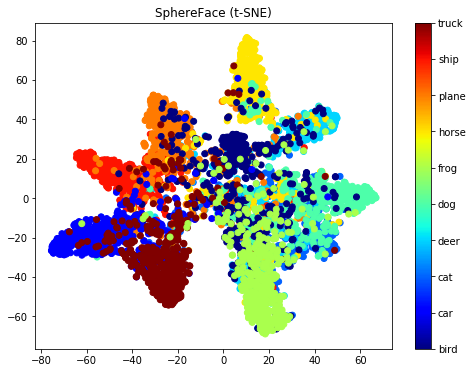

In [14]:
def learner_SphereFace(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy)
    learn.model = XFaceNet(learn.model, train_data, SphereProduct, m=int(4))
    learn.callback_fns.append(partial(LabelCatcher))
    learn.fit_one_cycle(1)
    learn.unfreeze()
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    return learn

if VISUALIZE_EMBEDDINGS:
    visualize_learner_embeddings(learner_SphereFace(all_data), 'SphereFace (t-SNE)', all_data)

In [ ]:
toytest.do_tests('ShpereFace', learner_SphereFace, delete_models=True)


Testing ShpereFace for case #0


epoch,train_loss,valid_loss,accuracy,time
0,0.724661,0.614360,0.785000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.666678,0.613895,0.705000,00:01
1,0.619127,0.619335,0.600000,00:01
2,0.598759,0.707569,0.560000,00:01
3,0.518070,0.684407,0.625000,00:01
4,0.465779,0.694417,0.670000,00:01
5,0.409603,0.700412,0.705000,00:01
6,0.353094,0.607188,0.745000,00:01
7,0.310368,0.491165,0.785000,00:01
8,0.277399,0.432064,0.820000,00:01
9,0.250167,0.401394,0.835000,00:01


Better model found at epoch 0 with val_loss value: 0.6138951182365417.
Better model found at epoch 6 with val_loss value: 0.6071878671646118.
Better model found at epoch 7 with val_loss value: 0.4911648631095886.
Better model found at epoch 8 with val_loss value: 0.4320640563964844.
Better model found at epoch 9 with val_loss value: 0.40139350295066833.


epoch,train_loss,valid_loss,accuracy,time
0,0.073073,0.399767,0.820000,00:01
1,0.075891,0.409044,0.825000,00:01
2,0.065765,0.461429,0.840000,00:01
3,0.055730,0.504687,0.820000,00:01
4,0.055274,0.545184,0.805000,00:01
5,0.048388,0.574071,0.820000,00:01
6,0.043861,0.571069,0.815000,00:01
7,0.038387,0.573957,0.815000,00:01
8,0.036678,0.575281,0.810000,00:01
9,0.035552,0.575408,0.810000,00:01


Better model found at epoch 0 with val_loss value: 0.3997671902179718.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ShpereFace for case #1


epoch,train_loss,valid_loss,accuracy,time
0,0.842597,0.619771,0.630000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.671138,0.624171,0.620000,00:01
1,0.610384,0.526613,0.770000,00:01
2,0.524438,0.496865,0.730000,00:01
3,0.453900,0.628515,0.695000,00:01
4,0.387014,0.501348,0.770000,00:01
5,0.324806,0.416461,0.815000,00:01
6,0.285303,0.322691,0.865000,00:01
7,0.246234,0.275743,0.880000,00:01
8,0.215928,0.249563,0.870000,00:01
9,0.193828,0.242309,0.880000,00:01


Better model found at epoch 0 with val_loss value: 0.6241709589958191.
Better model found at epoch 1 with val_loss value: 0.526613175868988.
Better model found at epoch 2 with val_loss value: 0.4968651235103607.
Better model found at epoch 5 with val_loss value: 0.4164610207080841.
Better model found at epoch 6 with val_loss value: 0.32269081473350525.
Better model found at epoch 7 with val_loss value: 0.27574267983436584.
Better model found at epoch 8 with val_loss value: 0.2495625615119934.
Better model found at epoch 9 with val_loss value: 0.2423093020915985.


epoch,train_loss,valid_loss,accuracy,time
0,0.024458,0.238973,0.885000,00:01
1,0.039880,0.227591,0.885000,00:01
2,0.031282,0.214665,0.900000,00:01
3,0.027085,0.225161,0.915000,00:01
4,0.026909,0.235147,0.915000,00:01
5,0.023130,0.238440,0.915000,00:01
6,0.023859,0.218698,0.915000,00:01
7,0.021497,0.208461,0.915000,00:01
8,0.019743,0.202518,0.930000,00:01
9,0.030235,0.197114,0.930000,00:01


Better model found at epoch 0 with val_loss value: 0.23897312581539154.
Better model found at epoch 1 with val_loss value: 0.2275906503200531.
Better model found at epoch 2 with val_loss value: 0.21466539800167084.
Better model found at epoch 7 with val_loss value: 0.20846085250377655.
Better model found at epoch 8 with val_loss value: 0.20251789689064026.
Better model found at epoch 9 with val_loss value: 0.1971137970685959.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ShpereFace for case #2


epoch,train_loss,valid_loss,accuracy,time
0,0.814386,0.604816,0.635000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.694736,0.594582,0.635000,00:01
1,0.662165,0.510305,0.745000,00:01
2,0.572538,0.495711,0.725000,00:01
3,0.494538,0.568153,0.735000,00:01
4,0.420878,0.492145,0.770000,00:01
5,0.350679,0.369300,0.830000,00:02
6,0.299284,0.263672,0.900000,00:01
7,0.270504,0.196438,0.925000,00:01
8,0.243860,0.178398,0.945000,00:01
9,0.219711,0.181167,0.950000,00:01


Better model found at epoch 0 with val_loss value: 0.5945823788642883.
Better model found at epoch 1 with val_loss value: 0.5103052854537964.
Better model found at epoch 2 with val_loss value: 0.495710551738739.
Better model found at epoch 4 with val_loss value: 0.49214455485343933.
Better model found at epoch 5 with val_loss value: 0.36930006742477417.
Better model found at epoch 6 with val_loss value: 0.26367247104644775.
Better model found at epoch 7 with val_loss value: 0.19643770158290863.
Better model found at epoch 8 with val_loss value: 0.17839840054512024.


epoch,train_loss,valid_loss,accuracy,time
0,0.048770,0.183206,0.950000,00:01
1,0.046319,0.184886,0.950000,00:01
2,0.039381,0.188986,0.935000,00:01
3,0.033254,0.203114,0.935000,00:01
4,0.027558,0.211055,0.940000,00:01
5,0.024237,0.219554,0.935000,00:01
6,0.023561,0.218443,0.930000,00:01
7,0.020907,0.223080,0.930000,00:01
8,0.019102,0.228955,0.920000,00:01
9,0.019396,0.245504,0.910000,00:01


Better model found at epoch 0 with val_loss value: 0.1832062005996704.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ShpereFace for case #3


epoch,train_loss,valid_loss,accuracy,time
0,0.860355,0.619001,0.675000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.678432,0.613459,0.680000,00:01
1,0.682219,0.567966,0.705000,00:01
2,0.611808,0.476956,0.770000,00:01
3,0.522554,0.370739,0.835000,00:01
4,0.450604,0.297994,0.870000,00:01
5,0.383974,0.257082,0.895000,00:01
6,0.330918,0.244527,0.885000,00:01
7,0.290929,0.265450,0.905000,00:01
8,0.257526,0.299966,0.895000,00:01
9,0.235056,0.340591,0.890000,00:01


Better model found at epoch 0 with val_loss value: 0.6134591102600098.
Better model found at epoch 1 with val_loss value: 0.5679659247398376.
Better model found at epoch 2 with val_loss value: 0.4769555926322937.
Better model found at epoch 3 with val_loss value: 0.37073853611946106.
Better model found at epoch 4 with val_loss value: 0.29799404740333557.
Better model found at epoch 5 with val_loss value: 0.2570824921131134.
Better model found at epoch 6 with val_loss value: 0.24452657997608185.


epoch,train_loss,valid_loss,accuracy,time
0,0.118196,0.278498,0.885000,00:01
1,0.077556,0.310454,0.895000,00:01
2,0.071986,0.340670,0.900000,00:01
3,0.060872,0.417950,0.880000,00:01
4,0.051739,0.513427,0.865000,00:01
5,0.052570,0.588497,0.860000,00:01
6,0.046018,0.632062,0.845000,00:01
7,0.042390,0.674093,0.845000,00:01
8,0.038467,0.719854,0.830000,00:01
9,0.034491,0.728321,0.835000,00:01


Better model found at epoch 0 with val_loss value: 0.27849820256233215.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ShpereFace for case #4


epoch,train_loss,valid_loss,accuracy,time
0,0.862361,0.626880,0.615000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.608375,0.659533,0.535000,00:01
1,0.601491,0.684372,0.545000,00:01
2,0.543278,0.834251,0.550000,00:01
3,0.474752,1.143435,0.575000,00:01
4,0.410776,1.308242,0.595000,00:01
5,0.343005,1.196452,0.620000,00:01
6,0.298022,1.033855,0.680000,00:01
7,0.267675,0.835852,0.730000,00:01
8,0.242748,0.676814,0.745000,00:01
9,0.217712,0.592396,0.785000,00:01


Better model found at epoch 0 with val_loss value: 0.6595331430435181.
Better model found at epoch 9 with val_loss value: 0.5923960208892822.


epoch,train_loss,valid_loss,accuracy,time
0,0.086643,0.530041,0.815000,00:01
1,0.059307,0.477529,0.830000,00:01
2,0.055150,0.477535,0.820000,00:01
3,0.051529,0.449213,0.825000,00:01
4,0.049205,0.403248,0.845000,00:01
5,0.051159,0.393673,0.860000,00:01
6,0.052295,0.399077,0.855000,00:01
7,0.047652,0.398998,0.840000,00:01
8,0.044385,0.414065,0.835000,00:01
9,0.040489,0.421743,0.835000,00:01


Better model found at epoch 0 with val_loss value: 0.5300406813621521.
Better model found at epoch 1 with val_loss value: 0.4775291383266449.
Better model found at epoch 3 with val_loss value: 0.44921302795410156.
Better model found at epoch 4 with val_loss value: 0.4032476544380188.
Better model found at epoch 5 with val_loss value: 0.39367255568504333.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ShpereFace for case #5


epoch,train_loss,valid_loss,accuracy,time
0,0.940326,0.642662,0.665000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.786142,0.655706,0.560000,00:01
1,0.742221,0.660120,0.565000,00:01
2,0.668046,0.777400,0.565000,00:01
3,0.608555,1.004166,0.575000,00:01
4,0.545161,0.949234,0.620000,00:01
5,0.483784,0.791372,0.670000,00:01
6,0.419603,0.680587,0.725000,00:01
7,0.374021,0.602897,0.760000,00:02
8,0.334573,0.554212,0.775000,00:01
9,0.305558,0.527642,0.780000,00:01


Better model found at epoch 0 with val_loss value: 0.6557064056396484.
Better model found at epoch 7 with val_loss value: 0.6028974056243896.
Better model found at epoch 8 with val_loss value: 0.554212212562561.
Better model found at epoch 9 with val_loss value: 0.5276415944099426.


epoch,train_loss,valid_loss,accuracy,time
0,0.096030,0.505709,0.800000,00:01
1,0.078003,0.510747,0.800000,00:01
2,0.077740,0.545781,0.785000,00:01
3,0.067566,0.542839,0.785000,00:01
4,0.056202,0.533506,0.800000,00:01
5,0.060704,0.539472,0.815000,00:01
6,0.058991,0.565086,0.805000,00:01
7,0.054749,0.560593,0.800000,00:01
8,0.051258,0.549686,0.795000,00:01
9,0.048362,0.543742,0.810000,00:01


Better model found at epoch 0 with val_loss value: 0.5057087540626526.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ShpereFace for case #6


epoch,train_loss,valid_loss,accuracy,time
0,0.803067,0.672544,0.565000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.613345,0.690893,0.530000,00:01
1,0.606847,0.674874,0.570000,00:01
2,0.568308,0.760814,0.525000,00:01
3,0.494545,1.052075,0.535000,00:01
4,0.416539,1.193529,0.580000,00:01
5,0.360312,1.005949,0.645000,00:01
6,0.311966,0.846724,0.705000,00:01
7,0.272604,0.751527,0.735000,00:01
8,0.237622,0.746987,0.745000,00:01
9,0.212821,0.734721,0.740000,00:01


Better model found at epoch 0 with val_loss value: 0.6908925771713257.
Better model found at epoch 1 with val_loss value: 0.6748742461204529.


epoch,train_loss,valid_loss,accuracy,time
0,0.707105,0.724801,0.495000,00:01
1,0.656973,0.797588,0.505000,00:01
2,0.582504,1.106162,0.530000,00:01


Better model found at epoch 0 with val_loss value: 0.7248014211654663.


## 6. Center Loss

- Y. Wen, K. Zhang, Z. Li, and Y. Qiao, A discriminative feature learning approach for deep face recognition,” in European Conference on Computer Vision. Springer, 2016, pp. 499–515. https://ydwen.github.io/papers/WenECCV16.pdf
- Pytorch implementation: https://github.com/KaiyangZhou/pytorch-center-loss

In [ ]:
try:
    from center_loss import *
except:
    ! wget https://raw.githubusercontent.com/KaiyangZhou/pytorch-center-loss/master/center_loss.py
    from center_loss import *

In [ ]:
class WrapCenterLoss(nn.Module):
    "CenterLoss wrapper for https://github.com/KaiyangZhou/pytorch-center-loss."
    
    def __init__(self, learn, data, weight_cent=1/10):
        super().__init__()
        self.org_loss = learn.loss_func
        self.center_loss = CenterLoss(data.c, data.c)
        self.weight_cent = weight_cent

    def forward(self, output, target):
        dL = self.org_loss(output, target)
        dC = self.center_loss(output, target)
        #print(dL, dC)
        d = dL + self.weight_cent * dC
        return d

def learner_CenterLoss(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy)
    learn.loss_func = WrapCenterLoss(learn, train_data, weight_cent=1/8) ## Hand tuned
    learn.fit_one_cycle(1)
    learn.unfreeze()
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    return learn

if VISUALIZE_EMBEDDINGS:
    visualize_learner_embeddings(learner_CenterLoss(all_data), 'CenterLoss (t-SNE)', all_data)

In [ ]:
toytest.do_tests('CenterLoss', learner_CenterLoss, delete_models=True)

# Summary

# Stat: AUC


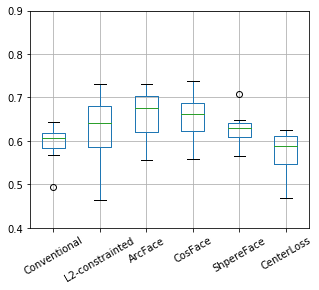

# Stat: Normalized distances


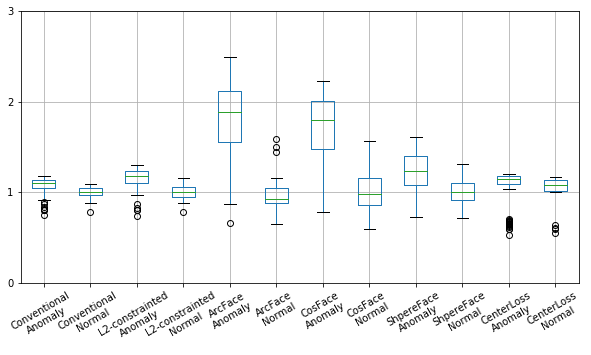


## [0, 1, 2, 3, 4, 5, 6, 7]: normalized mean distance


,Conventional,L2-constrained,ArcFace,CosFace,ShpereFace,CenterLoss
<unk> 0,1.144469,1.207691,2.370814,2.096250,1.318155,1.174481
<unk> 1,1.079739,1.139138,1.319381,1.561902,1.331918,1.185961
<unk> 2,1.135728,1.279317,1.892726,2.026221,1.453223,1.189408
<unk> 3,1.155340,1.256151,2.297371,2.085326,1.318885,1.132039
<unk> 4,1.121384,1.226679,1.563732,1.762762,1.399408,1.203630
<unk> 5,1.107965,1.258071,1.845670,1.869278,1.373028,1.180804
<unk> 6,1.114819,1.204416,1.355673,1.410519,1.340853,1.193679
<unk> 7,1.078354,1.040677,1.474260,1.072448,1.230974,1.086658
8,1.067707,0.961600,0.964532,0.671640,1.120194,1.076197
9,1.065017,1.040176,1.031473,1.238868,1.229868,1.169147



## [1, 2, 3, 4, 5, 6, 7, 8]: normalized mean distance


,Conventional,L2-constrained,ArcFace,CosFace,ShpereFace,CenterLoss
0,1.041477,0.996392,0.896285,0.988164,1.019353,1.137856
<unk> 1,1.047707,1.045339,1.084090,1.267677,0.990163,1.130460
<unk> 2,1.161399,1.138757,1.930064,1.864769,1.406423,1.195137
<unk> 3,1.092386,0.981922,1.163361,1.217141,1.109892,1.155139
<unk> 4,1.156994,1.155099,1.890863,1.811760,1.444969,1.194504
<unk> 5,1.135995,1.090779,1.489503,1.342180,1.120972,1.175751
<unk> 6,1.100689,1.152642,2.272390,2.091544,1.549862,1.178851
<unk> 7,1.096034,1.101689,1.856218,1.907207,1.473817,1.203448
<unk> 8,1.096886,1.133579,2.118940,1.936753,1.181272,1.146689
9,0.980827,0.952661,0.721186,0.829889,0.843415,1.085845



## [2, 3, 4, 5, 6, 7, 8, 9]: normalized mean distance


,Conventional,L2-constrained,ArcFace,CosFace,ShpereFace,CenterLoss
0,0.989407,1.006219,0.844268,0.892198,1.086675,1.051257
1,0.959270,0.913266,0.729536,0.707724,1.096206,1.058389
<unk> 2,1.105018,1.235441,1.807744,1.819172,1.370884,1.163561
<unk> 3,1.003088,1.033195,1.117409,0.943228,1.092297,1.080197
<unk> 4,1.098506,1.215233,1.565366,1.550003,1.300477,1.159900
<unk> 5,1.083037,1.188693,1.674984,1.479300,1.321248,1.138996
<unk> 6,1.074735,1.195610,1.575507,1.618898,1.251296,1.144860
<unk> 7,1.114870,1.199374,2.117018,1.965704,1.317900,1.123903
<unk> 8,1.140006,1.156879,1.897086,1.497477,1.397863,1.121035
<unk> 9,1.025475,1.004009,1.014222,0.787612,1.179390,1.085275



## [3, 4, 5, 6, 7, 8, 9, 0]: normalized mean distance


,Conventional,L2-constrained,ArcFace,CosFace,ShpereFace,CenterLoss
<unk> 0,0.814268,0.821355,0.874068,0.841022,1.080897,1.160466
1,0.886605,1.003191,1.029339,0.979646,1.039509,1.126714
2,0.786558,0.782765,0.795960,0.835071,0.978472,1.141954
<unk> 3,0.748765,0.736734,0.666084,0.892215,1.043093,1.130041
<unk> 4,0.799542,0.804682,0.896001,0.915704,0.972456,1.157785
<unk> 5,0.806518,0.804114,1.140254,1.110778,1.128516,1.151148
<unk> 6,0.839920,0.872560,1.353621,1.475095,1.140416,1.155920
<unk> 7,0.873871,0.971788,2.298181,1.974882,1.308237,1.177081
<unk> 8,0.919519,1.062284,2.342723,1.781531,1.181770,1.193967
<unk> 9,0.888768,1.026997,1.538347,1.240970,1.078480,1.144074



## [4, 5, 6, 7, 8, 9, 0, 1]: normalized mean distance


,Conventional,L2-constrained,ArcFace,CosFace,ShpereFace,CenterLoss
<unk> 0,1.132430,1.170466,1.936010,2.000161,1.606867,1.127546
<unk> 1,1.123656,1.225118,2.024754,1.944591,1.424893,1.177076
2,1.090363,1.131909,1.583957,1.563876,1.183718,1.140959
3,0.982770,0.883482,0.891966,0.912340,0.995801,1.003599
<unk> 4,1.107347,1.146056,1.667682,1.686948,1.158472,1.154746
<unk> 5,1.113425,1.185225,2.069580,2.135673,1.448008,1.116002
<unk> 6,1.101450,1.067340,1.593783,1.402454,1.396302,1.100368
<unk> 7,1.082770,1.025148,1.300390,1.354086,1.342505,1.075356
<unk> 8,1.123035,1.098247,1.982663,1.797430,1.607289,1.114826
<unk> 9,1.149484,1.261323,2.495453,2.229253,1.576345,1.162855



## [5, 6, 7, 8, 9, 0, 1, 2]: normalized mean distance


,Conventional,L2-constrained,ArcFace,CosFace,ShpereFace,CenterLoss
<unk> 0,1.137138,1.253452,2.362639,2.084498,1.377953,1.127820
<unk> 1,1.114336,1.188562,2.016663,1.516654,1.467796,1.184962
<unk> 2,1.121877,1.180185,1.994706,1.614264,1.444618,1.171244
3,0.983805,1.097308,1.055973,1.144694,1.017642,1.020712
4,1.079271,1.098822,1.505274,1.204991,1.309497,1.167987
<unk> 5,1.146940,1.262573,2.056755,1.977256,1.227802,1.088962
<unk> 6,1.045340,1.194886,1.799388,1.982072,1.203332,1.120142
<unk> 7,1.017867,1.038201,2.139361,1.886053,1.215559,1.102318
<unk> 8,1.070084,1.130084,2.381951,2.101963,1.236802,1.152899
<unk> 9,1.151484,1.257603,2.365063,1.802456,1.349251,1.179686



## [6, 7, 8, 9, 0, 1, 2, 3]: normalized mean distance


,Conventional,L2-constrained,ArcFace,CosFace,ShpereFace,CenterLoss
<unk> 0,1.145341,1.253888,2.192051,2.096326,0.803130,0.654377
<unk> 1,1.152519,1.275169,1.892702,1.880113,0.896145,0.706782
<unk> 2,1.123932,1.213604,1.754397,1.477918,0.811103,0.659933
<unk> 3,1.127317,1.180050,2.485709,2.205899,0.722207,0.594272
4,1.071084,1.098959,1.159033,1.018598,0.811129,0.641340
5,1.006453,0.927065,0.901083,1.015196,0.716878,0.605397
<unk> 6,1.105744,1.144286,1.220056,0.996505,0.789017,0.650406
<unk> 7,1.137886,1.238613,1.778496,2.146091,0.881218,0.683042
<unk> 8,1.154608,1.263259,1.910500,2.057309,0.880736,0.677616
<unk> 9,1.158019,1.258070,1.712718,1.596263,0.859245,0.686568



## [7, 8, 9, 0, 1, 2, 3, 4]: normalized mean distance


,Conventional,L2-constrained,ArcFace,CosFace,ShpereFace,CenterLoss
<unk> 0,1.168749,1.286408,2.004543,1.967273,1.565977,1.174943
<unk> 1,1.125187,1.213981,2.119216,1.943485,1.495344,1.186988
<unk> 2,1.152252,1.268057,1.910053,1.957236,1.585353,1.184051
<unk> 3,1.180252,1.297668,2.113984,2.174829,1.557368,1.143689
<unk> 4,1.162271,1.249391,2.210380,2.113654,1.553041,1.201157
5,1.016076,0.928505,0.649722,0.596113,0.932141,1.138183
6,1.044184,1.005792,1.046442,1.107076,0.998825,1.110650
<unk> 7,1.101749,1.199103,2.117422,1.904748,1.170010,1.128927
<unk> 8,1.101171,1.183580,2.105418,1.720375,1.250747,1.147369
<unk> 9,1.081990,1.095178,1.579260,1.464948,1.221723,1.143122



## [8, 9, 0, 1, 2, 3, 4, 5]: normalized mean distance


,Conventional,L2-constrained,ArcFace,CosFace,ShpereFace,CenterLoss
<unk> 0,1.086024,1.250893,2.332835,2.117533,1.438910,1.160327
<unk> 1,1.129573,1.206269,2.235928,1.616024,1.416814,1.188713
<unk> 2,1.044893,1.160291,1.564976,1.826769,1.321787,1.165202
<unk> 3,0.967315,1.133304,1.434149,1.452224,1.135401,1.031462
<unk> 4,1.038923,1.121308,1.361369,1.637922,1.203728,1.130641
<unk> 5,0.999210,1.161970,1.404727,2.070644,1.217750,1.103148
6,0.942540,0.996209,0.888982,0.864218,0.997007,1.030982
7,1.010918,0.992065,0.934126,0.870025,1.111984,1.149073
<unk> 8,1.043342,1.034731,1.142703,1.127175,1.168175,1.154496
<unk> 9,1.072925,1.268588,2.281502,2.102672,1.380648,1.135218



## [9, 0, 1, 2, 3, 4, 5, 6]: normalized mean distance


,Conventional,L2-constrained,ArcFace,CosFace,ShpereFace,CenterLoss
<unk> 0,1.011981,1.109916,1.900323,1.547949,0.827179,0.616313
<unk> 1,1.097641,1.228984,1.610816,1.709943,0.893429,0.690849
<unk> 2,1.080277,1.229270,2.443045,2.021738,0.879373,0.638939
<unk> 3,0.975791,1.098738,1.730896,1.587649,0.725392,0.528507
<unk> 4,1.078904,1.250459,2.274783,2.202302,0.896371,0.672998
<unk> 5,1.057670,1.194387,2.098321,2.009110,0.852682,0.631987
<unk> 6,1.031567,1.095297,1.840761,1.396114,0.809501,0.600016
7,0.957124,1.030402,1.442866,1.284399,0.718010,0.553573
8,1.038545,1.153213,0.927997,1.275273,0.793674,0.590186
<unk> 9,1.077152,1.247406,1.766183,1.799738,0.840221,0.651328


In [22]:
normalized_anomaly_distances, normalized_normal_distances, aucs = toytest.test_summary(dist_range=[0, 1, 2, 3])
toytest.save_results('results_AnomalyCIFAR10')

In [23]:
aucs.describe()

,Conventional,L2-constrained,ArcFace,CosFace,ShpereFace,CenterLoss
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.596002,0.628385,0.660096,0.654251,0.628005,0.574168
std,0.042825,0.077910,0.057759,0.054894,0.037863,0.048684
min,0.493825,0.463273,0.557275,0.558866,0.564671,0.468716
25%,0.583730,0.587215,0.621247,0.622540,0.608938,0.546364
50%,0.607088,0.641607,0.676000,0.662513,0.629571,0.587922
75%,0.618325,0.680773,0.703093,0.687206,0.641600,0.611253
max,0.644415,0.730769,0.731352,0.737870,0.707371,0.625495


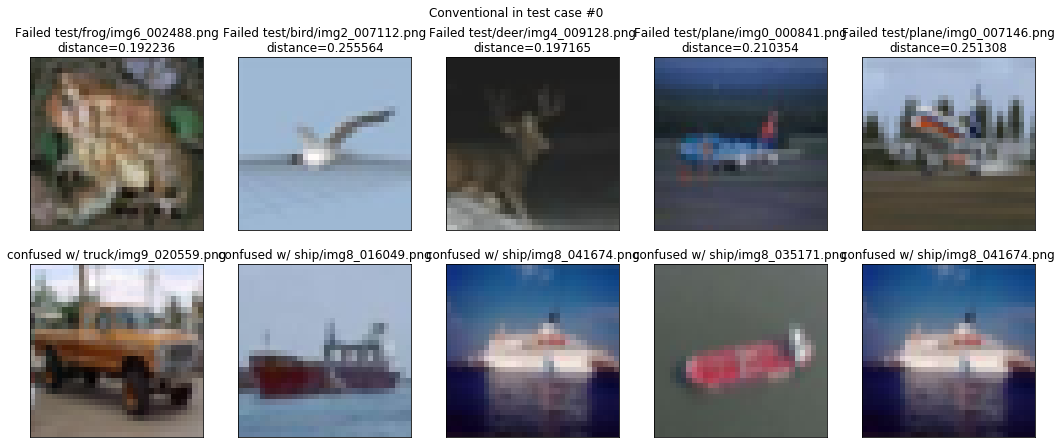

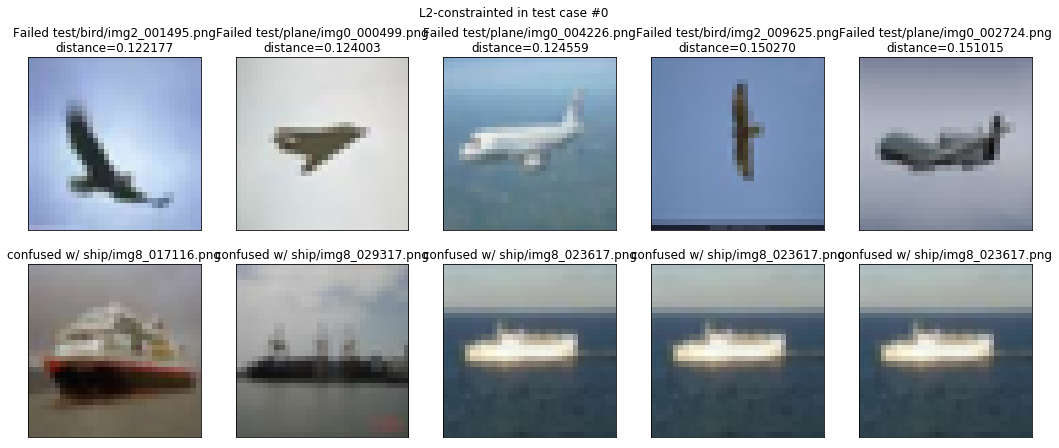

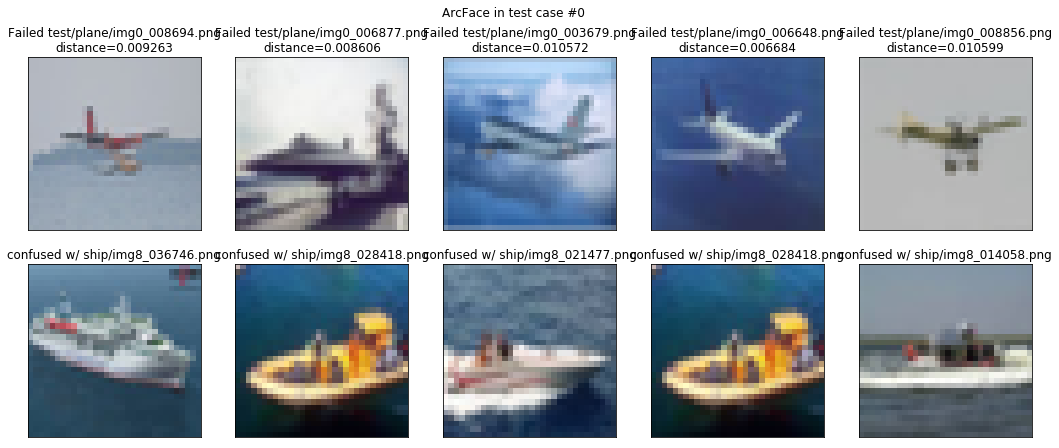

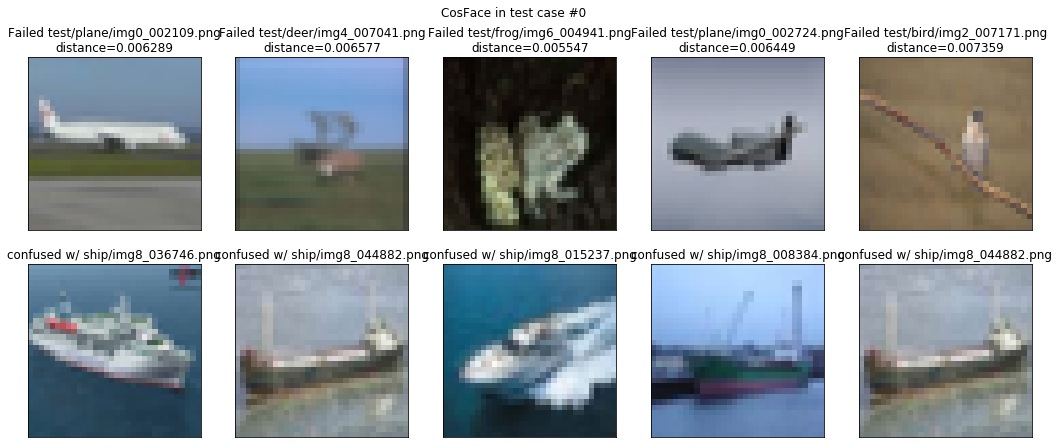

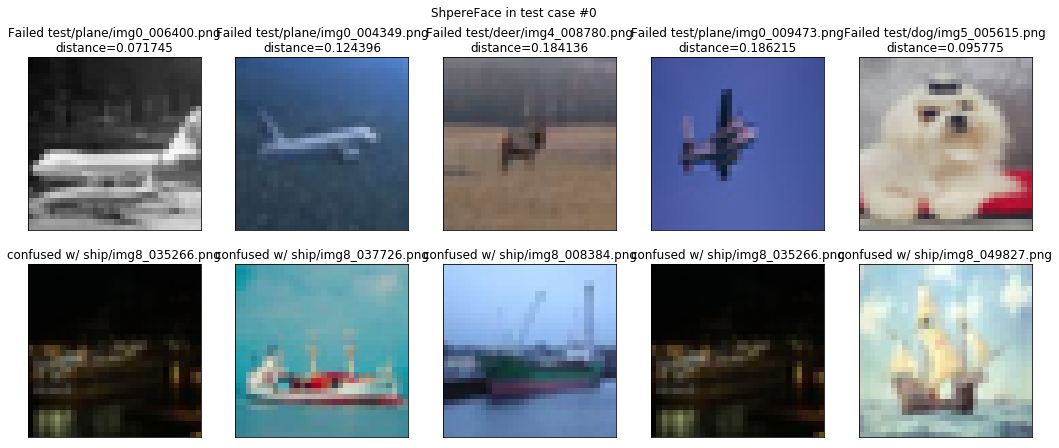

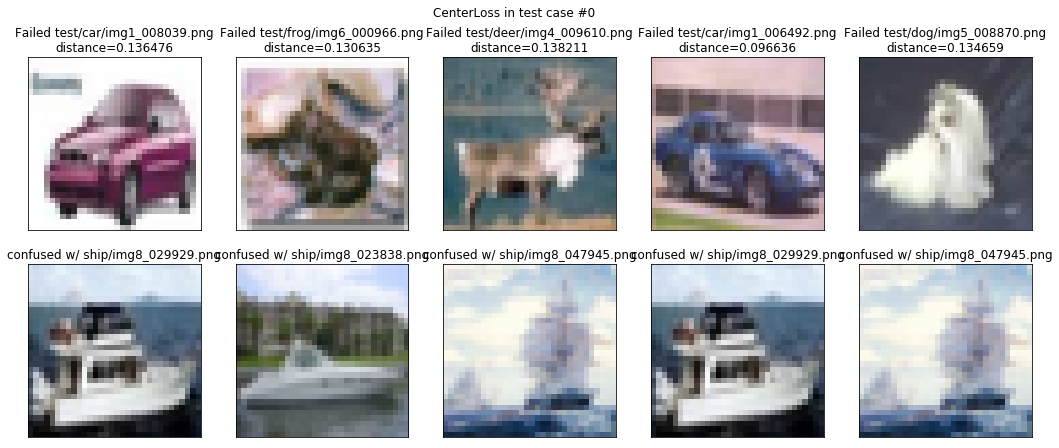

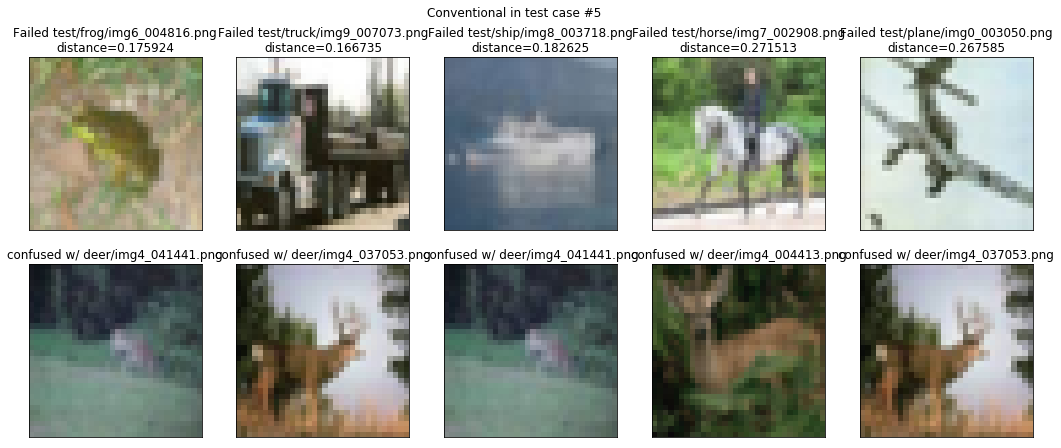

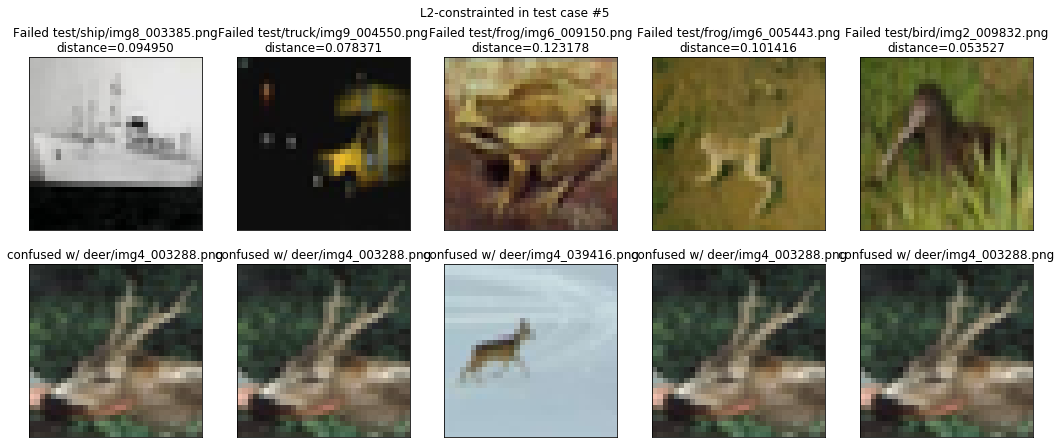

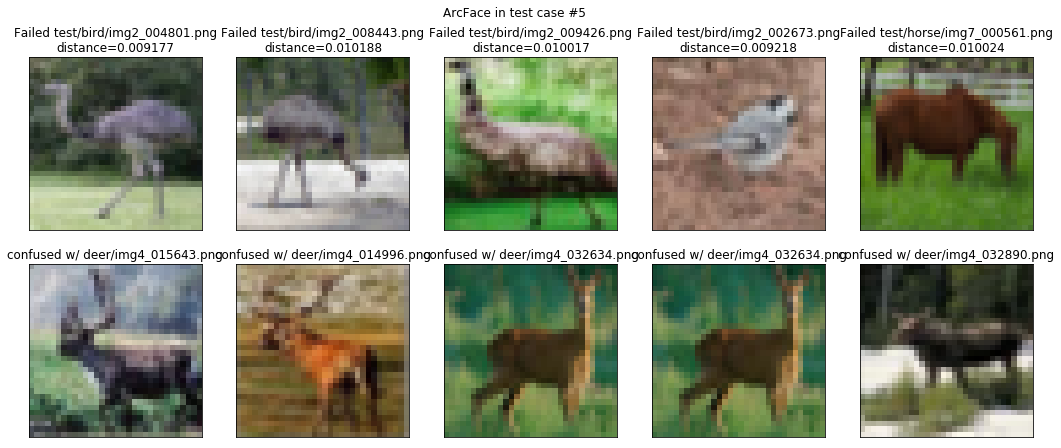

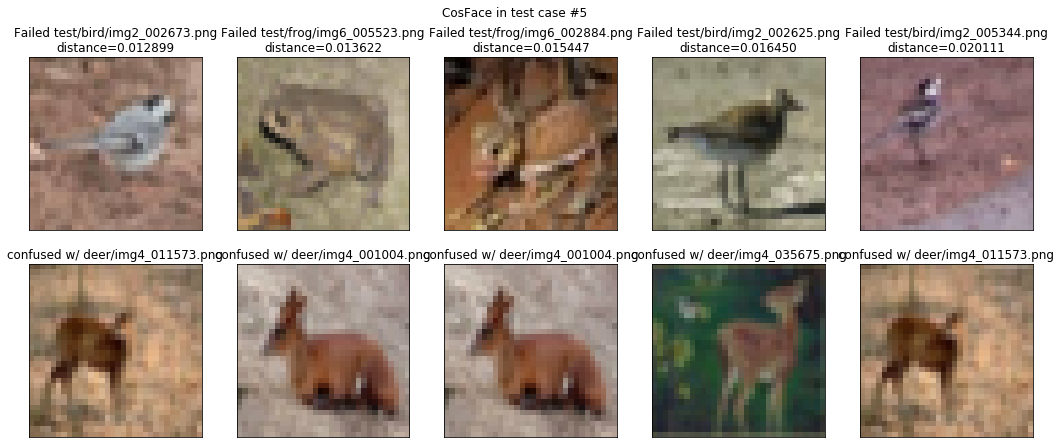

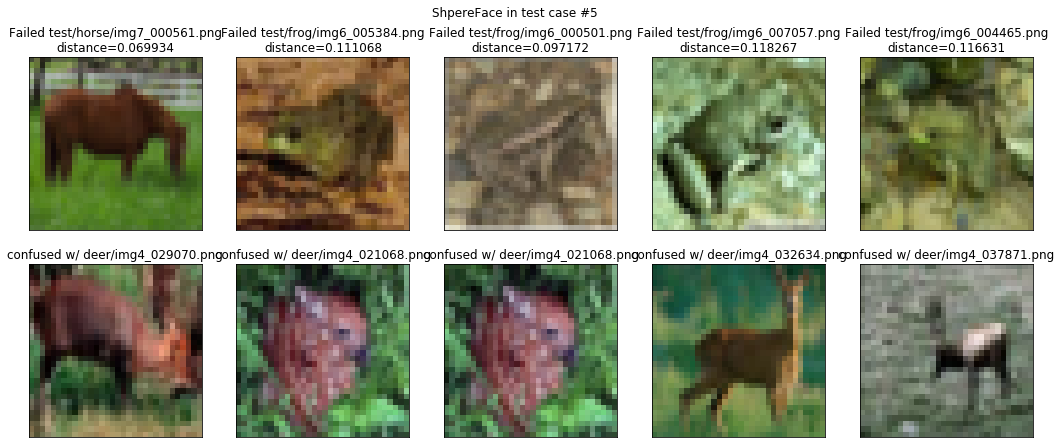

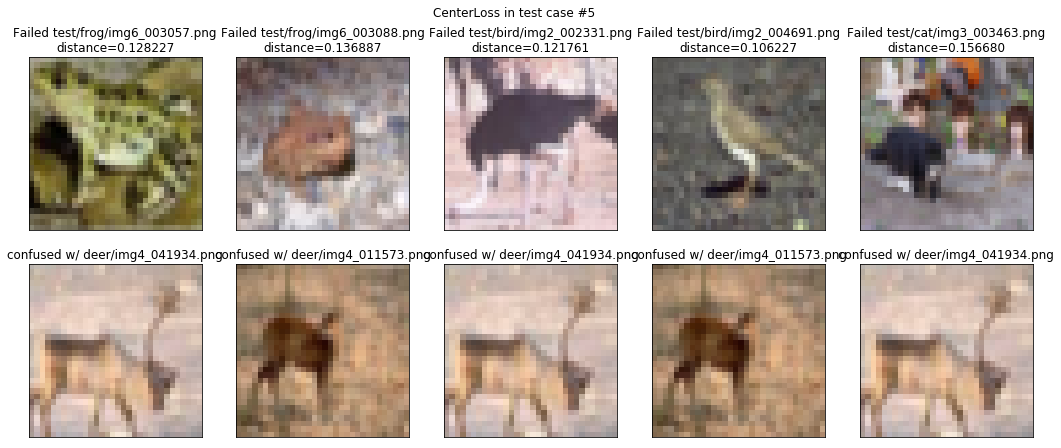

In [24]:
for i in [0, 5]: toytest.show_all_worst_test_images(i)

## MinKMean Summary

In [51]:
df = pd.DataFrame(aucs.mean())
df.columns = ['K = 5']
df['K = 10'] = [0.603089,	0.635262,	0.658497,	0.655458,	0.637213,	0.573301]
df['K = 20'] = [0.603560,	0.634430,	0.656541,	0.654339,	0.636673,	0.569736]
df['K = 30'] = [0.598894,	0.626035,	0.654879,	0.650961,	0.628100,	0.565728]
df['Min only'] = [0.588053,	0.621550,	0.656297,	0.653951,	0.623782,	0.576140]
df = df.transpose()

In [52]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
df.style.apply(highlight_max, axis=0)

,Conventional,L2-constrained,ArcFace,CosFace,ShpereFace,CenterLoss
K = 5,0.596002,0.628385,0.660096,0.654251,0.628005,0.574168
K = 10,0.603089,0.635262,0.658497,0.655458,0.637213,0.573301
K = 20,0.60356,0.63443,0.656541,0.654339,0.636673,0.569736
K = 30,0.598894,0.626035,0.654879,0.650961,0.6281,0.565728
Min only,0.588053,0.62155,0.656297,0.653951,0.623782,0.57614


In [53]:
pd.DataFrame({'total mean': df.mean(axis=1)}).style.apply(highlight_max, axis=0)

,total mean
K = 5,0.623485
K = 10,0.627137
K = 20,0.62588
K = 30,0.620766
Min only,0.619962
